# Notebook 001 (Initial Cleaning and EDA)

In [2]:
# Standard Imports
import pandas as pd
import numpy as np

# Visualization Imports
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Setting Default Theme in Matplotlib
# plt.style.use('seaborn-notebook')
import seaborn as sns

# Other Imports
import missingno as msno

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


____
# About This Notebook
_____
____
# Notebook Table of Contents
______

___
## Initial Cleaning and Evaluation
____

* [Reading and Preparing the Data](#reading_data)
* [Duplicate Values](#dups)
* [Missing Values](#nans)
* [Final Inspection of Missing Values](#nan_final)

____
## Initial EDA
____

* [Unique Values](#unique)

* [Value Frequencies and Extremes](#values)
    * [Producer "Winery" Frequencies and Extremes](#winery_freq)
    * [Wine Rating "Points" Frequency and Extremes](#points_freq)
    * [Price Frequency Distribution and Extremes](#price_freq)
    * [Varietal Frequency Distribution and Extremes](#varietal_freq)
    * [Region Frequency Distribution and Extremes](#region_freq)
    * [Country Frequency Distribution and Extremes](#country_freq)
___
## Price Relationships
___

* [Price Relationships](#price_relate)
    * [Price and Ratings "Points" Relationship](#rating_price)
    * [Correlation Heatmap of Price and Rating](#heatmap)
    * [Price versus Points Distribution](#point_dist)
    * [10 Highest Priced Wines](#10_high)
    * [Top 10 Lollipop Plot](#10_plot)
    * [Most Affordable Wines](#afford)
    * [Price and Designation Relationship](#designation)
    * [Most Expensive vs Least Expensive Wines and Their Ratings](#expensive)
    * [Wine Price for Each Wine Rating](#price_per)
    * [Wine Price and Ratings Greater than 95](#95)
    * [Producer and Price](#producer_price)
    * [100 Point Producers and Price Chart](#100)
    * [Regions by Price and Rating](#region_price)
    * [Varietal and Price](#varietal_price)
____
## Rating Relationships

* [Wine Rating Relationships](#rating_relate)
    * [Varietal and Rating](#varietal_rating)
    * [Country and Rating](#country_rating)
    * [Producers and Rating](#producer_rating)
    * [Region and Rating](#region_rating)


## Data Dictionary

|Feature Name|Description| 
|---|---|
|varietal| The variety of grape used to make the wine (i.e. Cabernet Sauvignon).|
|country|The country where the wine was produced.|
|description| A sommelier's brief note including key flavor, texture and structural descriptors.|
|designation|A single vineyard name or "fantasy" label name.|
|points|WineEnthusiast wine rating scale 1-100.|
|price|The price to purchase a bottle of wine in U.S. dollars.|
|province|The name or province where the wine was produced.|
|region_1|A primary wine region name such as Napa or Bordeaux|
|region_2|A secondary wine region name likely smaller than region_1 such as Oakville or Serralunga D'alba.|
|taster name|The name of the sommelier providing description.|
|taster_twitter_handle| The twitter handle of the sommelier providing description.|
|title|The title of the wine review (Also may include vintage and other naming characteristics of the wine).|
|color|The color of the wine. Either 'red' or 'white'|

________________________________
<a id='reading_data'></a>
# Reading and Preparing Data
_____________

In [4]:
wine_df = pd.read_csv('../data/001_winemag_data_130k_v2.csv')

In [5]:
wine_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
wine_df.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [7]:
shape_1 = wine_df.shape
shape_1

(129971, 13)

In [8]:
# renaming variety column to something more appropriate to wine and that will be easier for me to remember. 
wine_df.rename({'variety': 'varietal'}, axis = 1,  inplace = True)

In [9]:
wine_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,129908,43,US,54504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,129971,119955,"Seductively tart in lemon pith, cranberry and ...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,92506,37979,Reserve,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,129971,NaN,NaN,NaN,88.4471,3.03973,80,86,88,91,100
price,120975,NaN,NaN,NaN,35.3634,41.0222,4,17,25,42,3300
province,129908,425,California,36247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,108724,1229,Napa Valley,4480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,50511,17,Central Coast,11065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_twitter_handle,98758,15,@vossroger,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


_______
**Reorganizing Column Names**
______

In [10]:
columns = ['winery', 'varietal', 'designation', 'country', 'province',
           'description', 'region_1', 'region_2', 'points',
           'price', 'taster_name', 'taster_twitter_handle', 'title']
wine_df = wine_df.copy()[columns]

In [11]:
wine_df.head(1)

,winery,varietal,designation,country,province,description,region_1,region_2,points,price,taster_name,taster_twitter_handle,title
0,Nicosia,White Blend,Vulkà Bianco,Italy,Sicily & Sardinia,"Aromas include tropical fruit, broom, brimston...",Etna,NaN,87,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna)


______
<a id='dups'></a>
# Duplicate Values
______

In [13]:
wine_df['description'].duplicated().sum()

10016

In [14]:
# Dropping duplicate descriptions
wine_df = wine_df.drop_duplicates(subset = 'description')
wine_df.shape

(119955, 13)

In [15]:
wine_df['title'].duplicated().sum()

1148

In [16]:
wine_df['title'].value_counts().head(2)

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)     9
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)    7
Name: title, dtype: int64

In [17]:
wine_df = wine_df.drop_duplicates(subset = 'title')

In [18]:
wine_df['title'].duplicated().sum()

0

In [19]:
shape_2 = wine_df.shape
shape_2

(118807, 13)

In [34]:
shape_2[0]

118807

In [43]:
lost_samples = shape_1[0] - shape_2[0]
perc_lost = lost_samples / wine_df.shape[0]
print(f'Lost {lost_samples} samples by dropping duplicates account for {perc_lost}% of all observations in original dataset.')

Lost 11164 samples by dropping duplicates account for 0.09396752716590773% of all observations in original dataset.


______________________________
<a id='nans'></a>
# Missing Values
______________________________

___
**Dropping title and taster_twitter_handle columns**

After reviewing these columns I determined that there are a lot of null values here and these columns do not add any significance to my data set. 

____

In [21]:
 # dropping 'taster_twitter_handle' column because I don't really need that information. 
wine_df.drop(columns = [ 'taster_twitter_handle'], inplace = True)
wine_df.columns

Index(['winery', 'varietal', 'designation', 'country', 'province',
       'description', 'region_1', 'region_2', 'points', 'price', 'taster_name',
       'title'],
      dtype='object')

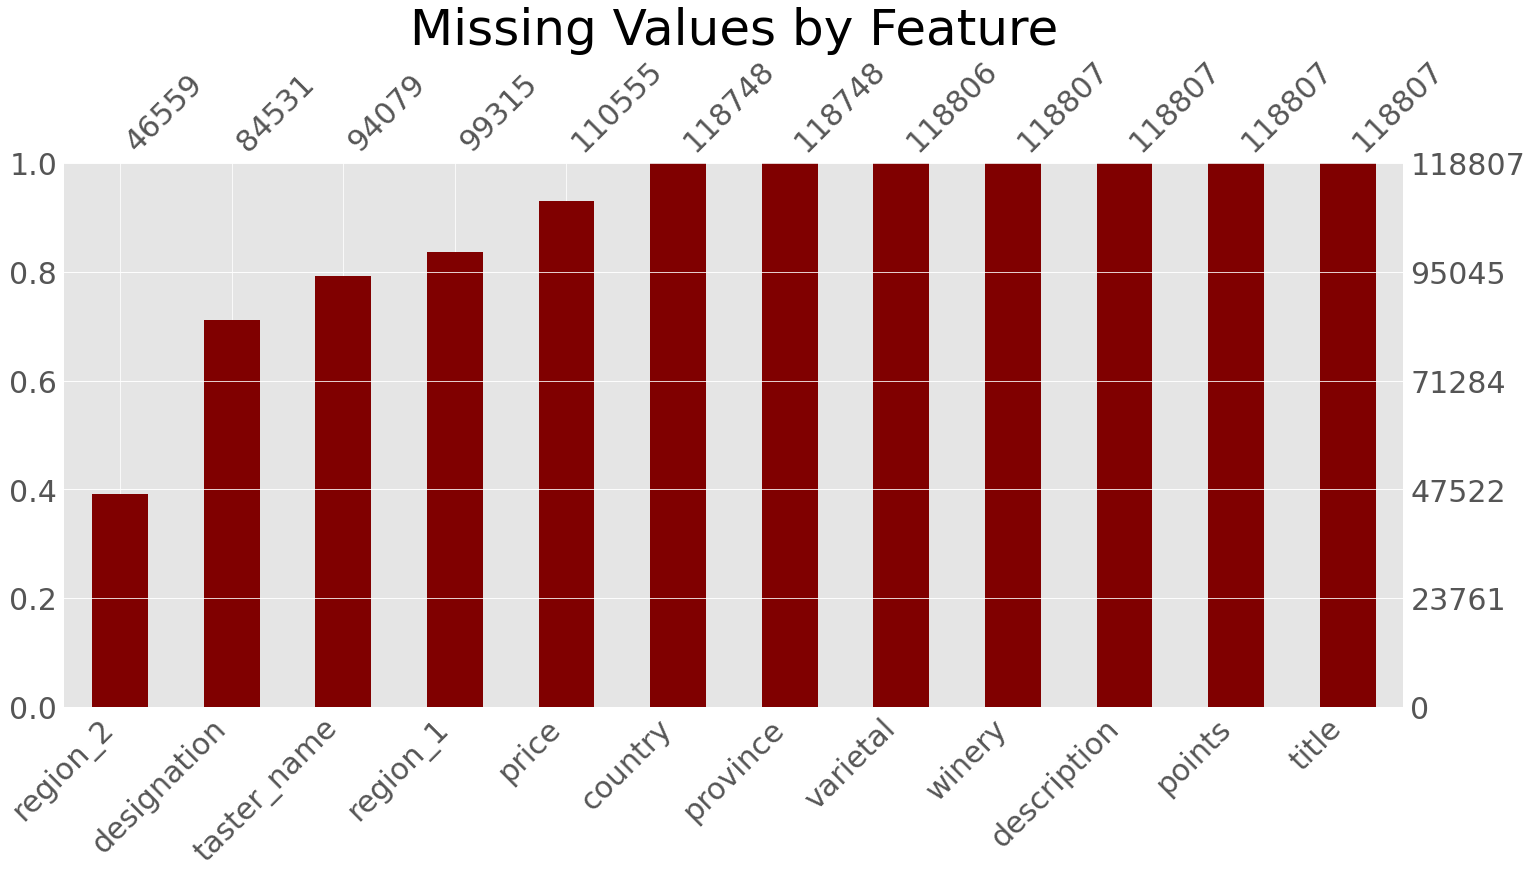

In [33]:
msno.bar(wine_df, labels = True, sort = 'ascending', fontsize = 30, color = 'maroon')

plt.title('Missing Values by Feature', size = 50);

In [1229]:
def null_percent(df):
    
    # create lists to house no_null counts and percentage of no nulls per column.
    null_list = []
    pct_null_list = []
    col_list = []
    
    #iterate through column list for indexing purposes.
    for column in df.columns:
        # add column to column list to use as column index in df created below
        col_list.append(column)
        
        # Calculating total number of values that are not null and appending to above list
        null = abs(df[column].isna().sum() - len(df[column]))
        null_list.append(null)
        
        
        # Calculating the percentage of values that are not null and appending to above list
        pct_null = round(null / len(df) * 100, 3)
        pct_null_list.append(pct_null)
        
        # create a dataframe of non nulls
        null_df = pd.DataFrame(null_list, col_list)
        
        # append percentage of non-nulls to dataframe
        null_df['perc_null'] = pct_null_list
        # rename 0 labeled column to unique_values
        null_df = null_df.rename(columns = {0:'null'})
    
    return null_df

In [1230]:
null_percent(wine_df)

,null,perc_null
winery,118807,100.000
varietal,118806,99.999
designation,84531,71.150
country,118748,99.950
province,118748,99.950
description,118807,100.000
region_1,99315,83.594
region_2,46559,39.189
points,118807,100.000
price,110555,93.054


_______
**Analysis of Missing Values**

* A few columns have quite a bit of null values. A quick look indicates that the missing values are not all that surprising and filling them with anything meaningful, in most cases, is likely not that necessary. There will be one case where I will have to make a tough decision regarding missing values. Price is missing 15% of its values so I will have to determine the best way to handle that. 
* The good news regarding missing values is that the one category that I will be using as my X variable 'description' is not missing any values. The rest of the features will just be used for EDA. 
______


**Fill Nans For all Columns**
_________

**Filling Nulls for region_2, region_1, taster_name and province**
* After inspecting the NANs for province it is determined that the province is not an important designation for the wineries with a missing value in that column. I am going to replace the NANs with 'unknown.'

In [1231]:
def fill_na_string(df, list_o_columns, filler):
    # setting df to df indexing list of columns
    # this is done so as not to replace nulls that I may want to handle differently
    # if the wish is to replace all nulls with this value then pass df.columns in list_o_columns parameter
    sliced_df = df.copy()[list_o_columns]
    
    # create empty lists to fill with values below
    col_list = []
    null_confirms = []
    
    #iterate through columns for the purpose of indexing
    for column in list_o_columns:
        col_list.append(column)
        
        # fill na value with specified replacement_string
        sliced_df[column].fillna(str(filler), inplace = True)
        
        # append null count to column list to confirm replacement
        null_confirms.append(f'There are {sliced_df[column].isna().sum()} null values in this column')
    
    # Create and return a DF with results confirming replaced nulls
    null_replace_df = pd.DataFrame(null_confirms, col_list)
    null_replace_df.rename(columns = {0:'Confirmed Nulls Replaced'}, inplace = True)

    # Indexing original df and replacing it with updated df
    df[null_columns_2replace] = sliced_df
    
    # printing results
    print(null_replace_df)
    print(f'****Null values replaced for specified columns.****')

In [1232]:
null_columns_2replace = ['region_2', 'region_1', 
                        'taster_name', 'province', 'designation']

fill_na_string(wine_df, null_columns_2replace, 'unknown')

                           Confirmed Nulls Replaced
region_2     There are 0 null values in this column
region_1     There are 0 null values in this column
taster_name  There are 0 null values in this column
province     There are 0 null values in this column
designation  There are 0 null values in this column
****Null values replaced for specified columns.****



**Country NANs**
______________

In [1233]:
# Showing all wineries with missing country names
wine_df[wine_df['country'].isnull() == True].groupby('winery').count();

In [1234]:
missing_countries = {
                    'Amiran Vepkhvadze': 'Georgia', 'Bachelder': 'Canada', 'Bartho Eksteen': 'South Africa', 
                    'Barton & Guestier': 'France', 'Büyülübağ': 'Turkey', 'Chilcas': 'Chile', 'El Capricho': 'Uruguay',
                    'Familia Deicas': 'Uruguay', 'Gotsa Family Wines': 'Georgia', 'Kakhetia Traditional Winemaking': 'Georgia',
                    'Ktima Voyatzi':'Greece', 'Les Frères Dutruy': 'Switzerland', 'Lismore': 'South Africa', 'Logodaj': 'Bulgaria',
                    'Mt. Beautiful': 'New Zealand', 'Neumeister': 'Austria', 'Newton Johnson': 'South African', 'Orbelus':'Bulgaria',
                    'Psagot': 'Israel', 'Ross-idi': 'Bulgarian', 'Santa Ema': 'Chile', 'Somlói Vándor': 'Hungary', 'St. Donat': 'Hungary',
                    'Stone Castle': 'Kosovo', 'Teliani Valley': 'Georgia', 'Tsililis': 'Greece', 'Undurraga': 'Chile' 
                   }

In [1235]:
null_country_idx = wine_df[wine_df['country'].isnull()].index

In [1236]:
def replace_null_country(winery):
    # creating a variable containing index of missing country value
    wine_index = wine_df[wine_df['winery'] == winery].index
    
    for index in wine_index:
        # replacing missing value with country
        wine_df.loc[wine_index , ['country']] = missing_countries.setdefault(winery)
        
for winery in missing_countries:
    replace_null_country(winery)

# checking to see that all nulls have been replaced. 
print(f'There are {wine_df["country"].isna().sum()} null values in country column')

# checking to see if some of the nulls were changed to default
wine_df[wine_df['country'] == 'default']

There are 0 null values in country column


,winery,varietal,designation,country,province,description,region_1,region_2,points,price,taster_name,title


___________
**Varietal NANs**

There is 1 NAN in Varietal column. Found, based on description column that this varietal was a Petite Syrah. Replaced NaN with Petite Syrah. 
__________

In [1237]:
wine_df[wine_df['varietal'].isnull() == True].groupby('winery').count()

,varietal,designation,country,province,description,region_1,region_2,points,price,taster_name,title
winery,,,,,,,,,,,
Carmen,0,1,1,1,1,1,1,1,1,1,1


In [1238]:
wine_df[wine_df['varietal'].isnull()]

,winery,varietal,designation,country,province,description,region_1,region_2,points,price,taster_name,title
86909,Carmen,NaN,unknown,Chile,Maipo Valley,"A chalky, dusty mouthfeel nicely balances this...",unknown,unknown,88,17.0,unknown,Carmen 1999 (Maipo Valley)


In [1239]:
wine_df.loc[86909, : 'description']['description']

"A chalky, dusty mouthfeel nicely balances this Petite Syrah's bright, full blackberry and blueberry fruit. Wheat-flour and black-pepper notes add interest to the bouquet; the wine finishes with herb and an acorny nuttiness. A good first Chilean wine for those more comfortable with the Californian style. It's got tannins to lose, but it's very good."

In [1240]:
wine_df['varietal'].fillna('Petite Syrah', inplace = True)
wine_df['varietal'].isna().sum()

0

______
**Price NANs**


I am may not use this column when doing preprocessing and modeling. However, I want to analyze relationships between price and other features but do not want to add my own bias through imputation methods such as mean imputation or zero imputation. Because of this I will create a separate dataframe where I analyze price relationships and keep wine_df in tact with mean imputation so that I may have an option to impute or not. 
______

In [1241]:
# creating copy of wine_df called price_df for the purpose of having a DF with deleted rows where price nulls exist. 
price_df = wine_df.copy()

In [1242]:
# mean imputing NANs in wine_df
wine_df['price'].fillna(wine_df['price'].mode(), inplace = True)

In [1243]:
price_df = price_df.dropna()

In [1244]:
price_df.isna().sum()

winery         0
varietal       0
designation    0
country        0
province       0
description    0
region_1       0
region_2       0
points         0
price          0
taster_name    0
title          0
dtype: int64

____________
<a id='nan_final'></a>
# Final Inspection of Missing Values
__________


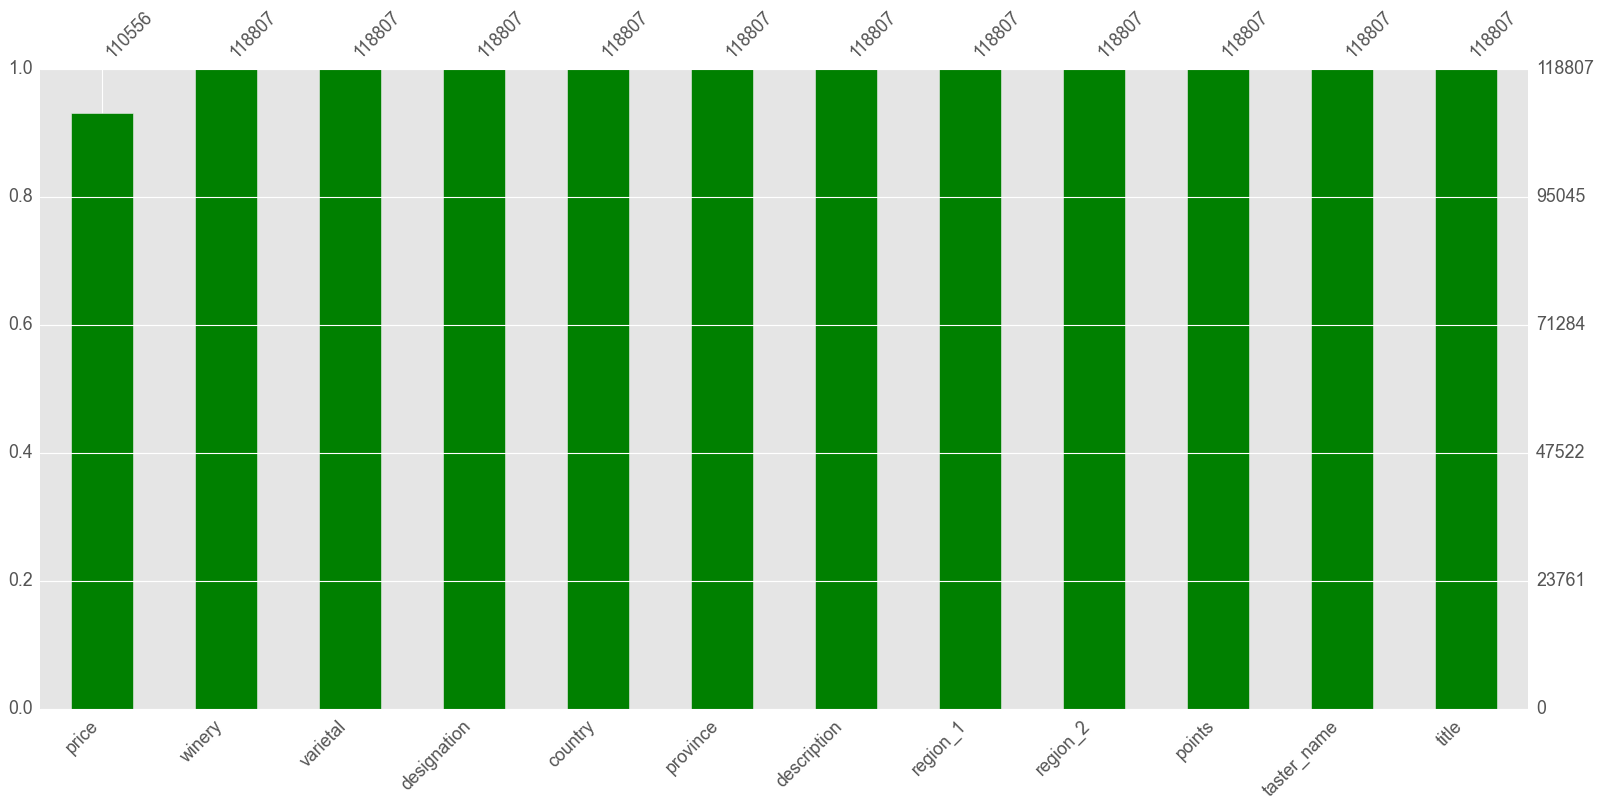

In [1245]:
msno.bar(wine_df, labels = True, sort = 'ascending', color = 'green');

* After cleaning columns of null and duplicates I am pretty much good to proceed. I will handle the nulls in the price column at a later point with mean, mode or median imputation. I am holding off on dealing with price nulls at the moment because I want to do EDA on price and will create a separate price df with null values removed. I will mean, mode or median impute the actual wine_df. 
_______________

<a id='unique'></a>
___________
# Unique Values
____________

In [1246]:
def unique_values(df):
    
    # creating empty lists to populate with code below
    col_list = []
    value_list = []
    length_list = []
    
    # iterating through columns list for indexing purposes.
    for column in df.columns:
        
        # create a list of column names
        col_list.append(column)
        # create a list of unique values for each column
        unique_count = df[column].nunique()
        value_list.append(unique_count)
        # create a list of total values in each column
        length_list.append(round((unique_count / len(df[column]))* 100, 2))
    
    # create a dataframe of unique values
    unique_df = pd.DataFrame(value_list, col_list)
    # append total values to dataframe
    unique_df['perc_total_values'] = length_list
    # rename 0 labeled column to unique_values
    unique_df = unique_df.rename(columns = {0:'unique_values'})
    
    return unique_df

In [1247]:
# calling above function
unique_df = unique_values(wine_df)
unique_df

,unique_values,perc_total_values
winery,16755,14.10
varietal,708,0.60
designation,37976,31.96
country,46,0.04
province,426,0.36
description,118807,100.00
region_1,1230,1.04
region_2,18,0.02
points,21,0.02
price,386,0.32


* Most importantly, I am looking for the description column to have 100 percent unique values. This is the step, that I described at the beginning of the notebook, where I found that 60 percent of my values were duplicates and many of the duplicate descriptions were duplicated under multiple producers. 
* After going back to the begining of the notebook and fixing this problem I am left with far less data but it is promising to see that all of my description values are unique. 
* I also found the unique values for price to very interesting. only 391 price points of nearly 120,000 wines. This is a smaller distribution than I expected. It will be interesting to see how these values look when plotting.
* I am not too particularly surprised by the ratio of wineries to total samples but it is interesting to see that the ratio of total samples to wineries is about 7 wine offerings to each winery.
* Everything else seems to be about expected in terms of unique values.

<a id='values'></a>
________
# Value Frequencies and Extremes
_______

<a id='winery_freq'></a>
_____
### Producer "Winery" Frequency and Extremes
______

In [1248]:
# Creating a Df of just winery value =_counts
winery_values = pd.DataFrame(wine_df['winery'].value_counts())

# Bottle count per winery mean, mode and median
winery_mode = winery_values['winery'].mode()[0]
winery_median = winery_values['winery'].median()
winery_mean = winery_values['winery'].mean()
print(f'Number of Bottles Per Winery in Dataset (mode: {winery_mode}, median: {winery_median}, mean: {winery_mean})')

# Analyzing how much wineries with only 1 bottle represented in the data set. 
solo_wineries = round(winery_values[winery_values['winery'] == 1].count()[0] / len(winery_values) * 100, 2)
print(f'{solo_wineries}% of wineries in dataset have only one wine featured.')

Number of Bottles Per Winery in Dataset (mode: 1, median: 3.0, mean: 7.090838555655028)
27.42% of wineries in dataset have only one wine featured.


**In terms of observations per winery all of the wineries above are outliers.** If you look at the data below you will see that the most frequent value for observations per winery is 1 (mode of 1). The median offerings for each winery is 3 with a mean of just over 7 that is likely being pulled up by outliers. So most wineries have few offerings. 


#### Distribution of Winery Count Plots
_____

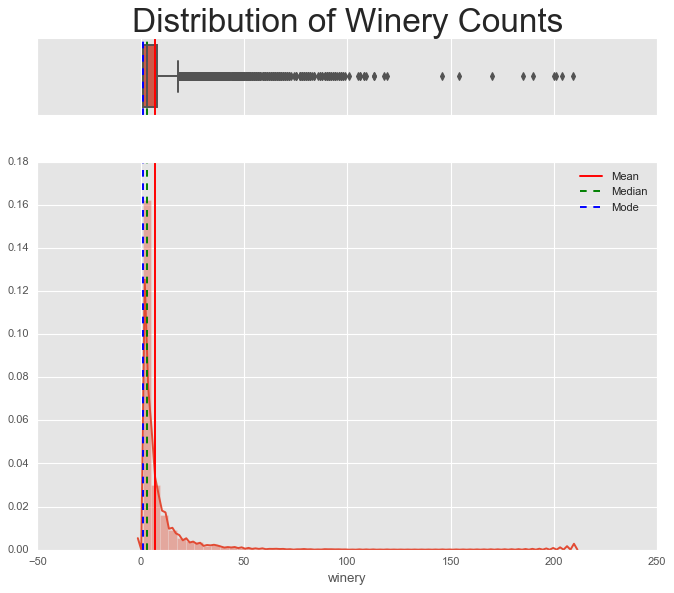

In [1249]:

# setting up f as figure plot and ax_box and ax_hist as the ax plots
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, figsize=(10,8), gridspec_kw = {'height_ratios': (.2, 1)})

# Plotting winery counts box plot
sns.boxplot(winery_values['winery'], ax = ax_box)

#plotting mean, median and mode for box plot
ax_box.axvline(winery_mean, color='r', linestyle='-')
ax_box.axvline(winery_median, color='g', linestyle='--')
ax_box.axvline(winery_mode, color='b', linestyle='--')

# plotting winery counts histogram
sns.distplot(winery_values['winery'], ax = ax_hist)

# plotting mean, median and mode for histogram
ax_hist.axvline(winery_mean, color = 'r', linestyle='-')
ax_hist.axvline(winery_median, color = 'g', linestyle='--')
ax_hist.axvline(winery_mode, color = 'b', linestyle='--')

plt.legend({'Mean':winery_mean, 'Median':winery_median, 'Mode': winery_mode})

# setting title
ax_box.set_title('Distribution of Winery Counts', fontsize = 30)


# setting boxplot xlabel to nothing
ax_box.set(xlabel='') ;

____
**Interpretation of Winery Counts Plot**
* This is a distribution of wineries based on how many times they show up in the data. Most wineries have more than one wine offered in the dataset with only 27% having only one wine. This could create potential limitations when training a predictor model as many wineries share a similar style across wine so the data may not be able to train the model effectively enough to handle nuanced data. 
_____


#### Top 10 Wineries by Count
____

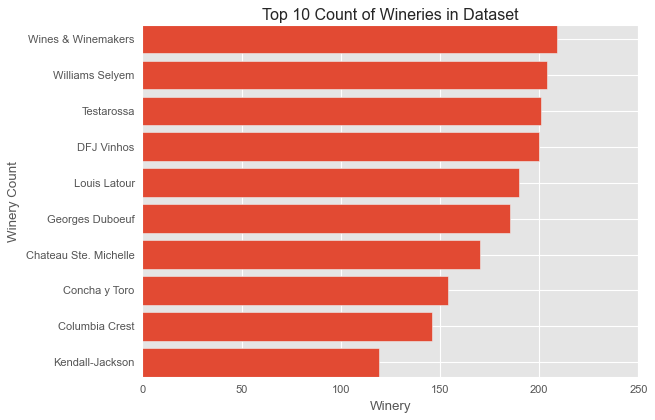

In [1250]:
# Creating a Df of top_10_wineries
top10_wineries = winery_values.nlargest(10, 'winery').sort_values('winery')

plt.barh(top10_wineries.index, top10_wineries['winery'])

plt.xlabel('Winery')
plt.ylabel('Winery Count')
plt.title('Top 10 Count of Wineries in Dataset');

____
**Analysis of Top 10 Producers**

The top 10 producers by volume of releases in the sample seem to mimic closely the average point counts of the entire sample. Mean for top 10 is 88.92. Mean for all is 88. However, intuition tells me that some producers in this top 10 list are producing much higher scores and some much lower. William-Selyem is a producer I think is producing great scores and bringing up the average. Latour as well. I will take a look at this. 

<a id='points_freq'></a>
______
### Wine Rating "Points" Frequency and Extremes
_______

In [1251]:

rating_88_count = wine_df[wine_df['points'] == 88].count()[0]
lowest_scores = round(wine_df['points'][wine_df['points'] < 84].count() / len(wine_df) * 100, 2)
highest_scores = round(wine_df['points'][wine_df['points'] > 94].count() / len(wine_df) * 100, 2)
mean_scores = round(wine_df['points'].mean(), 2)
median_scores = round(wine_df['points'].median(), 2)
mode_scores = round(wine_df['points'].mode()[0], 2)

print(f'Wines score less than 85 points in {lowest_scores}% of our samples')
print(f'Wines score more than 94 points in {highest_scores}% of our samples')
print(f'Mean wine score: {mean_scores}')
print(f'Median wine score: {median_scores}')
print(f'Mode wine score: {mode_scores}')
print(f"Number of wines with an 88 point score: {rating_88_count}")


Wines score less than 85 points in 4.89% of our samples
Wines score more than 94 points in 1.99% of our samples
Mean wine score: 88.44
Median wine score: 88.0
Mode wine score: 88
Number of wines with an 88 point score: 15121



#### Distribution of Rating "Point" Scores
_____

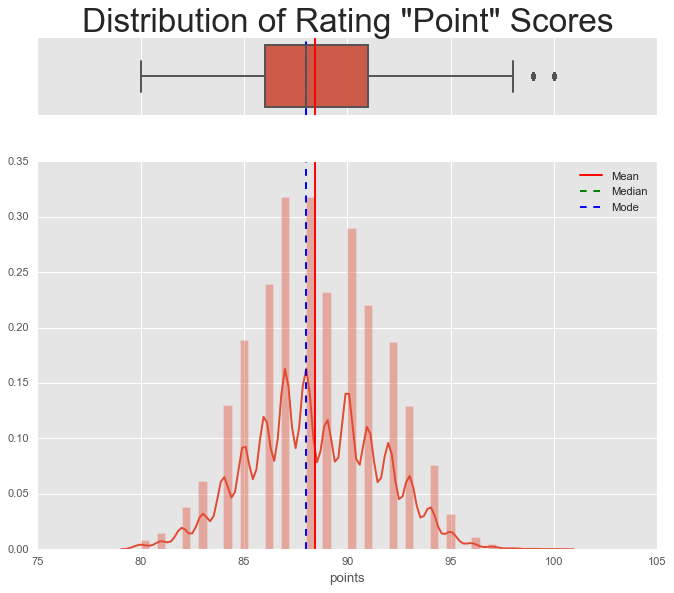

In [1252]:
# setting up f as figure plot and ax_box and ax_hist as the ax plots
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, figsize=(10,8), gridspec_kw = {'height_ratios': (.2, 1)})

# Plotting winery counts box plot
sns.boxplot(wine_df['points'], ax = ax_box)

#plotting mean, median and mode for box plot
ax_box.axvline(mean_scores, color='r', linestyle='-')
ax_box.axvline(median_scores, color='g', linestyle='--')
ax_box.axvline(mode_scores, color='b', linestyle='--')

# plotting winery counts histogram
sns.distplot(wine_df['points'], ax = ax_hist)

# plotting mean, median and mode for histogram
ax_hist.axvline(mean_scores, color = 'r', linestyle='-')
ax_hist.axvline(median_scores, color = 'g', linestyle='--')
ax_hist.axvline(mode_scores, color = 'b', linestyle='--')

plt.legend({'Mean':mean_scores, 'Median':median_scores, 'Mode': mode_scores})

# setting title
ax_box.set_title('Distribution of Rating "Point" Scores', fontsize = 30)


# setting boxplot xlabel to nothing
ax_box.set(xlabel='') ;

___
**Interpretation of Distribution of Rating "Point" Scores Plot**

* The official wine scale is a 50 point scale with 80 points marking the beginning of wines that are considered good. **The scale for this dataset starts at 80.**

| Rating | Meaning |
|---|---|
|50 to 59| Poor: undrinkable wine, not recommended|
|60 to 69| Below Average: drinkable wine but not recommended|
|70 to 79| Average: drinkable wine that may have minor flaws|
|80 to 84| Good: a solid, well-made wine|
|85 to 89| Very Good: wine with special qualities|
|90 to 94| Outstanding: wine with superior character and style|
|95 to 100| Classic: an all time great wine|

* You can see that none of the wines in the sample are of low quality. They all score Good or better. 
* The average rating is centered around 88-89 points with the mean, mode and medium all between 88-89 points. A little less than 5 percent of wines score less than 85 points so it is somewhat rare to find a very poor scoring wine in this sample. It is even more rare to find a great wine in this sample. Only around 2 percent of wines score over 94 points and achieved a 'Classic' rating. In light if this, it seems to be pretty difficult not to score Very Good or better on a rating. 
______




#### Rating and Price In Relation To Mean Price
______

<ipython-input-1253-2ee903b61fda>:26: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(handles, labels = ['Mean Price for All Wines'], loc = 'upper left')


Mean Price: $35.59.


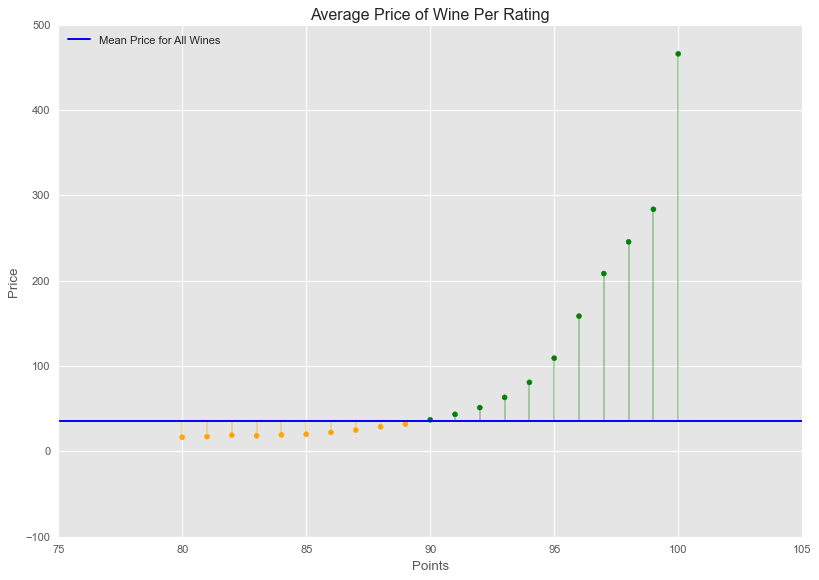

In [1253]:
plt.figure(figsize = (12,8))

# Create mean price number as threshold for ymin. 
mean_price = round(wine_df['price'].mean(), 2)
points_group = wine_df.groupby('points').mean()
y = points_group['price']
x = points_group.index 

# Create a color if the group is "B"
my_color=np.where(y>=mean_price, 'green', 'orange')

# The vertival plot is made using the hline function
plt.vlines(x, ymin=mean_price, ymax=y, color=my_color, alpha=.3)
plt.scatter(x, y, color=my_color, s=20, alpha=1)

mean = plt.axhline(mean_price, xmin=0, xmax = 10)
 
# Add title and axis names
plt.title("Average Price of Wine Per Rating", loc='center')
plt.xlabel('Points')
plt.ylabel('Price');


handles = [mean_price]

plt.legend(handles, labels = ['Mean Price for All Wines'], loc = 'upper left')


print(f'Mean Price: ${round(mean_price, 2)}.')

If you can find a wine over 90 points that is under $35 dollars you will generally find a good deal. This is a very simple heuristic. There is actually much more that goes into it as you will see in other plots and analysis. 

<a id='price_freq'></a>
_____

### Price Frequency Distribution and Extremes
_____

Mean: 35.59, Median: 25.0, Mode: 20.0


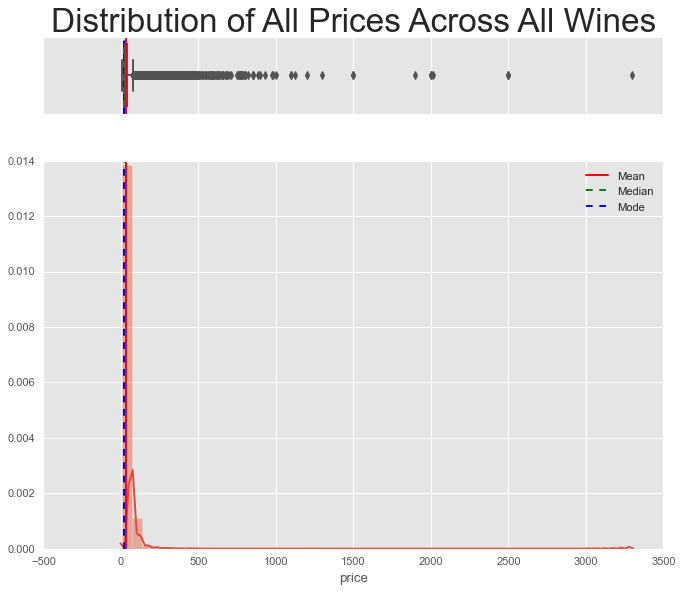

In [1254]:

___
#### Price Distribution Plot
price_freq = pd.DataFrame(wine_df['price'].value_counts())
price_freq.reset_index(inplace = True)
price_freq.rename(columns = {'price':'count', 'index':'price'}, inplace = True)

# calculating centers for all values of price ungrouped
price_mean = wine_df['price'].mean()
price_mode = wine_df['price'].mode()[0]
price_median = wine_df['price'].median()
print(f'Mean: {round(price_mean, 2)}, Median: {round(price_median, 2)}, Mode: {round(price_mode, 2)}')

# setting up f as figure plot and ax_box and ax_hist as the ax plots
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, figsize=(10,8), gridspec_kw = {'height_ratios': (.2, 1)})


# Plotting winery counts box plot
sns.boxplot(wine_df['price'], ax = ax_box)

#plotting mean, median and mode for box plot
ax_box.axvline(price_mean, color='r', linestyle='-')
ax_box.axvline(price_median, color='g', linestyle='--')
ax_box.axvline(price_mode, color='b', linestyle='--')

# plotting winery counts histogram
sns.distplot(wine_df['price'], ax = ax_hist)

# plotting mean, median and mode for histogram
ax_hist.axvline(price_mean, color = 'r', linestyle='-')
ax_hist.axvline(price_median, color = 'g', linestyle='--')
ax_hist.axvline(price_mode, color = 'b', linestyle='--')

plt.legend({'Mean':price_mean, 'Median':price_median, 'Mode': price_mode})

# setting title
ax_box.set_title('Distribution of All Prices Across All Wines', fontsize = 30)

# setting boxplot xlabel to nothing
ax_box.set(xlabel='') ;


#### Top 50 Price Points
_____

,Top 50 Sum of Prices,Top 50 Percent of All Prices,Top 50 Mean Prices,Top 50 Median Prices
0,101921,85.79,36.48,32.5


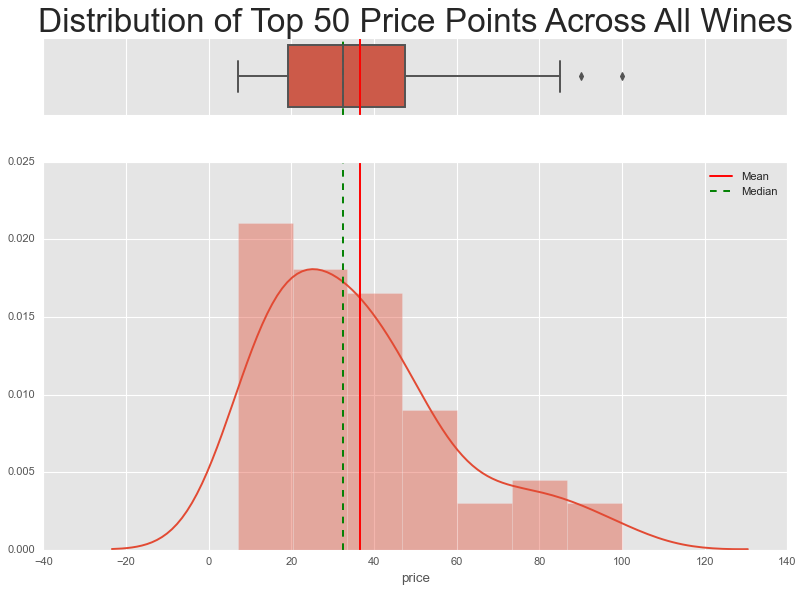

In [1255]:
# Creating Features to Analyze Top 50 Price Points measured by Count
top50_psum = price_freq['count'].nlargest(50).sum()
top50_ppct = round(price_freq['count'].nlargest(50).sum() / len(wine_df) * 100, 2)
top50 = price_freq.nlargest(50, 'count')
top50_pmean = top50['price'].mean()
top50_pmedian = top50['price'].median()

#Creating lists so that I may populate a dataframe showing statistics from top 50 price points
col = ['Top 50 Sum of Prices', 'Top 50 Percent of All Prices', 
       'Top 50 Mean Prices', 'Top 50 Median Prices']
top50s = [top50_psum, top50_ppct, top50_pmean, top50_pmedian]

# DF creation for top 50 price points
price_top50_df = pd.DataFrame(dict(zip(col, top50s)), index = range(1))


# Plotting Distribution of top 50 price points measured by Count

# creating dataframe of top50 price points sorted
top50_price_counts = top50.sort_values('price', ascending = False)

# setting up f as figure plot and ax_box and ax_hist as the ax plots
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, figsize=(12,8), gridspec_kw = {'height_ratios': (.2, 1)})


# Plotting winery counts box plot
sns.boxplot(top50_price_counts['price'], ax = ax_box,)

#plotting mean, median and mode for box plot
ax_box.axvline(top50_pmean, color='r', linestyle='-')
ax_box.axvline(top50_pmedian, color='g', linestyle='--')

# plotting winery counts histogram
sns.distplot(top50_price_counts['price'], ax = ax_hist,)

# plotting mean, median and mode for histogram
ax_hist.axvline(top50_pmean, color = 'r', linestyle='-')
ax_hist.axvline(top50_pmedian, color = 'g', linestyle='--')

plt.legend({'Mean':price_mean, 'Median':price_median})

# setting title
ax_box.set_title('Distribution of Top 50 Price Points Across All Wines', fontsize = 30)

# setting boxplot xlabel to nothing
ax_box.set(xlabel='') ;

price_top50_df

In [1256]:
outliers_large = top50_price_counts['price'].nlargest(2)
print(f'High outliers exist at the following prices: ${outliers_large[43]}, ${outliers_large[40]}')

outliers_small = top50_price_counts['price'].nsmallest(2)
print(f'Low outliers exist at the following prices: ${outliers_small[48]}, ${outliers_small[37]}')

High outliers exist at the following prices: $100.0, $90.0
Low outliers exist at the following prices: $7.0, $8.0


____
**Analysis of Price Distribution Plots**
* The majority of wines in this dataset are below 50 dollars. 
* The mean price for the top 50 prices by count was 36.48 with a median of 32.5 so variance isn't very high. 
* The top 50 price points account for over 85% of all price values in the dataset. That's a significant portion given that there are 386 unique price points in the data set. 
* The value that occurs most in the entire dataset is 20 dollars. 
* The centerpoint of all wines shows a mean of 35.59 and a median of 25 dollars. 
* I think it wouldn't surprise most people that most wines are under around 15 to 30 dollars. 
* The chart of the top 50 price points most clearly illustrates the left-leaning distribution of prices in the 15 to 30 dollar range. 
* Number of price points start to decline rapidly after 50 dollars and eventually reach a valley where they can't descend much more after the ever psychological 100 dollar price point. 
* The two outliers in the box plot for top 50 price points are 90 and 100 dollars respectively. These two price points as outliers illustrates the compact distribution of price point around the high 30 dollar range. 
_______

<a id='varietal_freq'></a>
____
### Varietal Frequency Distribution and Extremes

This section contains plots and analysis including frequency distributions and extreme values.
____


#### Varietal Distribution and Outliers
___

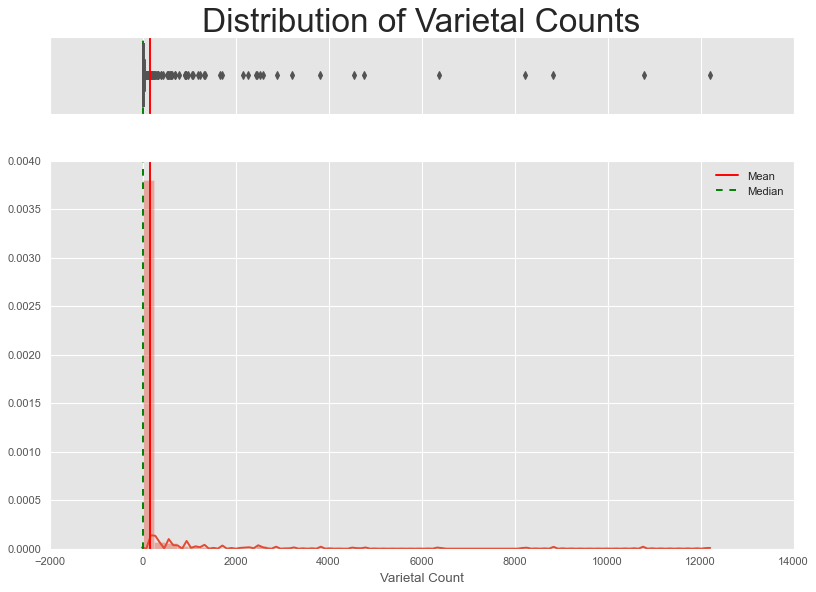

In [1257]:
wine_varietal_count = wine_df.groupby('varietal').count()

mean_var_count = wine_varietal_count['price'].mean()
median_var_count = wine_varietal_count['price'].median()


# setting up f as figure plot and ax_box and ax_hist as the ax plots
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, figsize=(12,8), gridspec_kw = {'height_ratios': (.2, 1)})


# Plotting winery counts box plot
sns.boxplot(wine_varietal_count['points'], ax = ax_box,)

#plotting mean, median and mode for box plot
ax_box.axvline(mean_var_count, color='r', linestyle='-')
ax_box.axvline(median_var_count, color='g', linestyle='--')

# plotting winery counts histogram
sns.distplot(wine_varietal_count['points'], ax = ax_hist,)

# plotting mean, median and mode for histogram
ax_hist.axvline(mean_var_count, color = 'r', linestyle='-')
ax_hist.axvline(median_var_count, color = 'g', linestyle='--')

plt.legend({'Mean':mean_var_count, 'Median':median_var_count})

# setting title
ax_box.set_title('Distribution of Varietal Counts', fontsize = 30)

# setting boxplot xlabel to nothing
ax_box.set(xlabel= '')
ax_hist.set(xlabel='Varietal Count') ;


#### Largest Varietal Counts
___

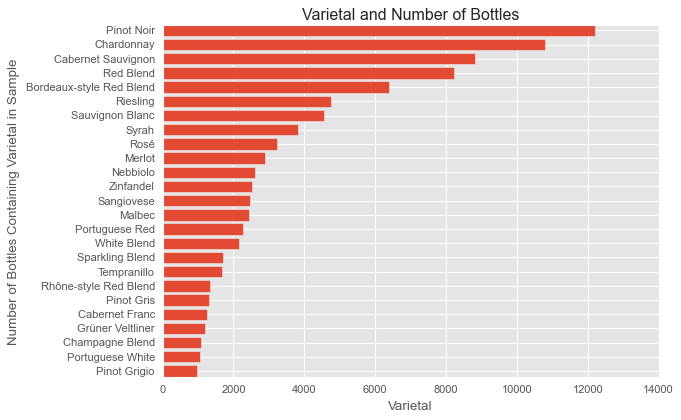

In [1258]:
top_varietals_by_count = wine_varietal_count.nlargest(25, 'points')[['winery']].sort_values('winery', ascending = True)
top_varietals_by_count

plt.barh(top_varietals_by_count.index, top_varietals_by_count['winery'])

plt.xlabel('Varietal')
plt.ylabel('Number of Bottles Containing Varietal in Sample')
plt.title('Varietal and Number of Bottles');

In [1259]:
top_25_sum = top_varietals_by_count.sum()[0]
sum_all_varietals = wine_varietal_count['description'].sum()
print(f'The top 25 varietals by count comprise {top_25_sum} of {sum_all_varietals} total grapes.' )
print(f'The top 25 varietals account for {round(top_25_sum / sum_all_varietals * 100, 2)}% of all grapes in the sample.')

The top 25 varietals by count comprise 91666 of 118807 total grapes.
The top 25 varietals account for 77.16% of all grapes in the sample.


<a id='region_freq'></a>
_______
### Region Frequency Distribution and Extremes


This section contains plots and analysis including frequency distributions and extreme values.

_____


#### Region Distribution and Outliers Plot
_______

There are an average of 80.81 wines per region in sample
The median number of wines offered per region is: 11.0
With a Standard Deviation of: 273.4


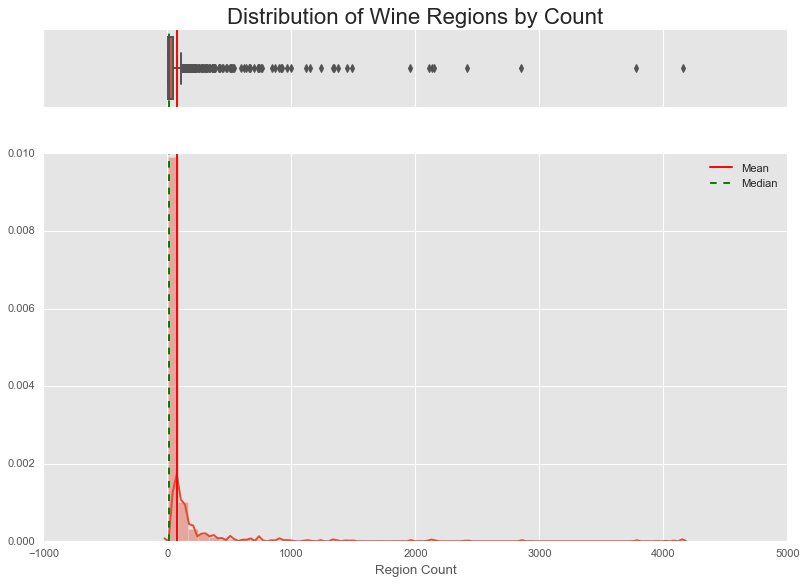

In [1260]:
wine_region_count = wine_df.groupby('region_1').count()

# Getting rid of values that have 'unknown' as label
wine_region_count = wine_region_count[wine_region_count.index != 'unknown']

mean_count = round(wine_region_count['points'].mean(), 2)
median_count = wine_region_count['points'].median()
standard_dev = round(wine_region_count['points'].std(), 2)


# setting up f as figure plot and ax_box and ax_hist as the ax plots
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, figsize=(12,8), gridspec_kw = {'height_ratios': (.2, 1)})


# Plotting winery counts box plot
sns.boxplot(wine_region_count['points'], ax = ax_box,)

#plotting mean, median and mode for box plot
ax_box.axvline(mean_count, color='r', linestyle='-')
ax_box.axvline(median_count, color='g', linestyle='--')

# plotting winery counts histogram
sns.distplot(wine_region_count['points'], ax = ax_hist,)

# plotting mean, median and mode for histogram
ax_hist.axvline(mean_count, color = 'r', linestyle='-')
ax_hist.axvline(median_count, color = 'g', linestyle='--')

plt.legend({'Mean':mean_count, 'Median':median_var_count})

# setting title
ax_box.set_title('Distribution of Wine Regions by Count', fontsize = 20)

# setting boxplot xlabel to nothing
ax_box.set(xlabel= '')
ax_hist.set(xlabel='Region Count') ;

print(f'There are an average of {round(mean_count, 2)} wines per region in sample')
print(f'The median number of wines offered per region is: {median_count}')
print(f'With a Standard Deviation of: {standard_dev}')


#### Largest Wine Regions by Number of Wines in Sample
______

In [1261]:
wine_region_count

,winery,varietal,designation,country,province,description,region_2,points,price,taster_name,title
region_1,,,,,,,,,,,
Abruzzo,5,5,5,5,5,5,5,5,5,5,5
Adelaida District,104,104,104,104,104,104,104,104,104,104,104
Adelaide,16,16,16,16,16,16,16,16,16,16,16
Adelaide Hills,97,97,97,97,97,97,97,97,95,97,97
Adelaide Plains,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...
Yolo County,43,43,43,43,43,43,43,43,43,43,43
York Mountain,9,9,9,9,9,9,9,9,9,9,9
Yorkville Highlands,72,72,72,72,72,72,72,72,71,72,72


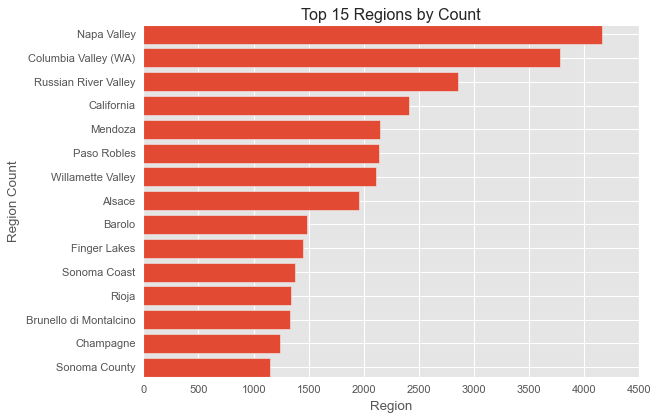

In [1262]:
# Creating a Df of top_15_regions
largest_15_regions = wine_region_count['points'].nlargest(15).sort_values()

plt.barh(largest_15_regions.index, largest_15_regions)

plt.xlabel('Region')
plt.ylabel('Region Count')
plt.title('Top 15 Regions by Count');

Regional count highlights the U.S. centricity of this dataset. This dataset does somewhat represent how wine is actually sold, bought and consumed worldwide. The U.S. is the leading consumer of wine in the world consuming 33 million hectaliters in 2018 over France's 27 million and Italy's 22 million. 

<a id='country_freq'></a>
_____
### Country Frequency and Distribuion
_____

There are an average of 2582.76 wines per country in sample
The median number of wines offered per country is: 69.0
With a Standard Deviation of: 8214.49


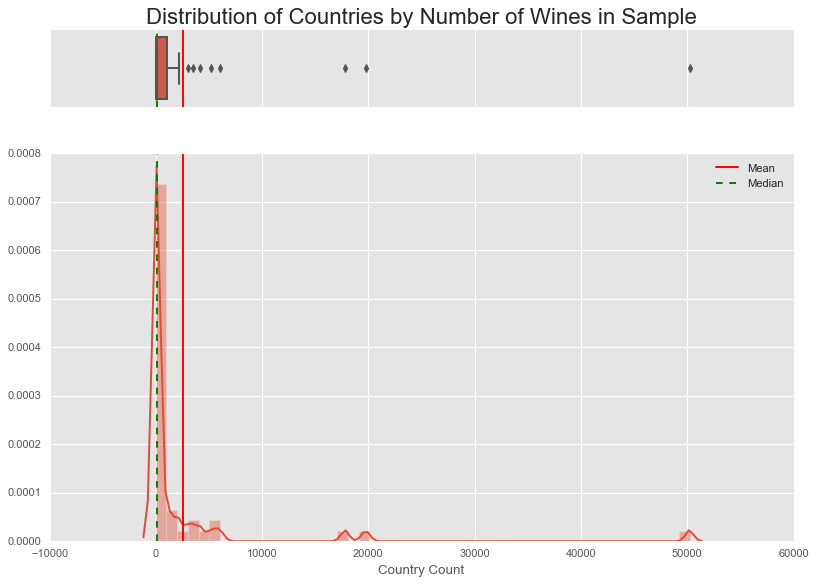

In [1263]:
country_count = wine_df.groupby('country').count()

mean_count = round(country_count['points'].mean(), 2)
median_count = country_count['points'].median()
standard_dev = round(country_count['points'].std(), 2)


# setting up f as figure plot and ax_box and ax_hist as the ax plots
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, figsize=(12,8), gridspec_kw = {'height_ratios': (.2, 1)})


# Plotting winery counts box plot
sns.boxplot(country_count['points'], ax = ax_box,)

#plotting mean, median and mode for box plot
ax_box.axvline(mean_count, color='r', linestyle='-')
ax_box.axvline(median_count, color='g', linestyle='--')

# plotting winery counts histogram
sns.distplot(country_count['points'], ax = ax_hist,)

# plotting mean, median and mode for histogram
ax_hist.axvline(mean_count, color = 'r', linestyle='-')
ax_hist.axvline(median_count, color = 'g', linestyle='--')

plt.legend({'Mean':mean_count, 'Median':median_count})

# setting title
ax_box.set_title('Distribution of Countries by Number of Wines in Sample', fontsize = 20)

# setting boxplot xlabel to nothing
ax_box.set(xlabel= '')
ax_hist.set(xlabel='Country Count') ;

print(f'There are an average of {round(mean_count, 2)} wines per country in sample')
print(f'The median number of wines offered per country is: {median_count}')
print(f'With a Standard Deviation of: {standard_dev}')

In [1264]:
top_8 = country_count.nlargest(8, 'points').reset_index()
top_8_sum = top_8['points'].sum()
sum_all_countries = country_count['points'].sum()
us_only = top_8['points'][0]
us_france_italy = top_8['points'][0:3].sum()
print(f'The top 8 countries comprise {top_8_sum} of {sum_all_countries} total wines offered.' )
print(f'The top 8 countries account for {round(top_8_sum / sum_all_countries * 100, 2)}% of all wines in the sample.')
print(f'The U.S. alone accounts for {us_only} of all wines offered. That is {round(us_only / sum_all_countries * 100, 2)}% of all wines.')
print(f'The top 3 (U.S., Fr., and It.) account for {us_france_italy} of all wines, {round(us_france_italy / sum_all_countries * 100, 2)}% of all wines.')


The top 8 countries comprise 109740 of 118807 total wines offered.
The top 8 countries account for 92.37% of all wines in the sample.
The U.S. alone accounts for 50220 of all wines offered. That is 42.27% of all wines.
The top 3 (U.S., Fr., and It.) account for 87745 of all wines, 73.86% of all wines.


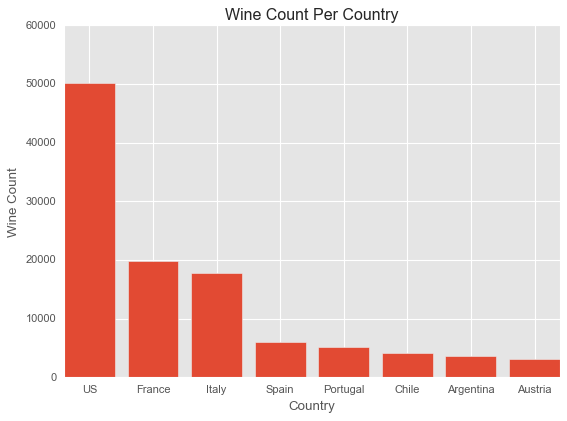

In [1265]:
plt.bar(top_8['country'], top_8['points'])

plt.xlabel('Country')
plt.ylabel('Wine Count')
plt.title('Wine Count Per Country');

Again, the wines offered by country count seems to somewhat adequately represent wine consumption patterns worldwide. It does skew a bit heavy toward the United States, which is not accurate but it correctly represents the three largest regions by consumption. (U.S., France and Italy). 

<a id='price_relate'></a>
____
# Price Relationships
____

<a id='rating_price'></a>
__________
#### Price and Ratings "Points" Relationship
____________

In [1266]:
price_pnt_corr = round(price_df.corr()['price'][0],3) * 100
print(f'Price and point correlation: {price_pnt_corr}%')

Price and point correlation: 41.699999999999996%


* There is some correlation between points and price but the relationship is not as strong as you would imagine.
* This is good news for consumers as this fact indicates that value is to be found. You can very likely find lower priced wines among the highly rated. That is assuming if rating is actually a reliable indicator of quality. 
* This lower correlation could also indicate that some higher price wines can be poorly rated and some lower price wines rated unjustly high. The question then becomes...What is wine rating exactly? Is there any solid basis for a wine's point rating in determining quality to begin with? 

<a id='heatmap'></a>
______
#### Correlation Heatmap of Price and Rating
_____

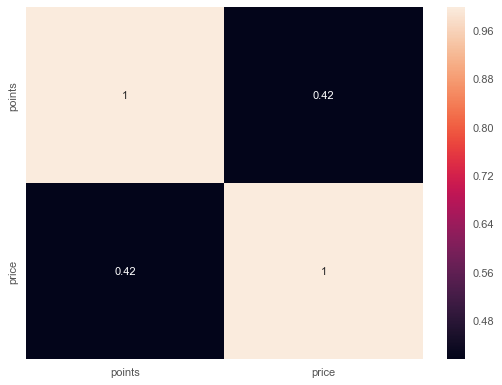

In [1267]:
sns.heatmap(price_df.corr(), annot = True);

<a id='point_dist'></a>
_________
#### Price versus Points Distribution 
________

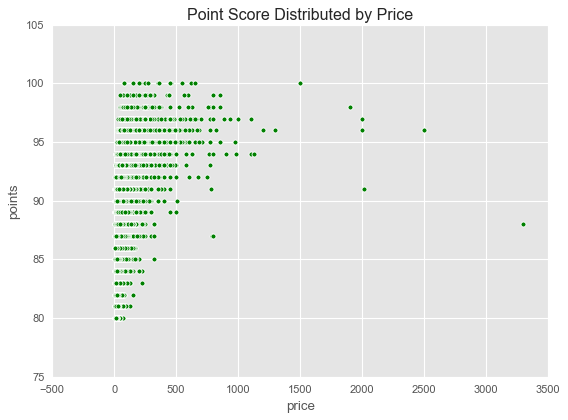

In [1268]:
sns.scatterplot(wine_df['price'], 
                wine_df['points'],
                color = 'green'
               )
plt.title('Point Score Distributed by Price');

____
**Analysis of Point Score Distributed By Price Plot**
____
* Most wines are priced under 500 but a significant amound are over 500. Thre are few wines over 1500 in price and could be considered outliers in terms of price. Since I am not looking to predict price or even use it as a feature, I will not be removing those outliers. Interesting to inspect those values though. 
_______

<a id='10_high'></a>
___
#### 10 Highest Priced Wines
____

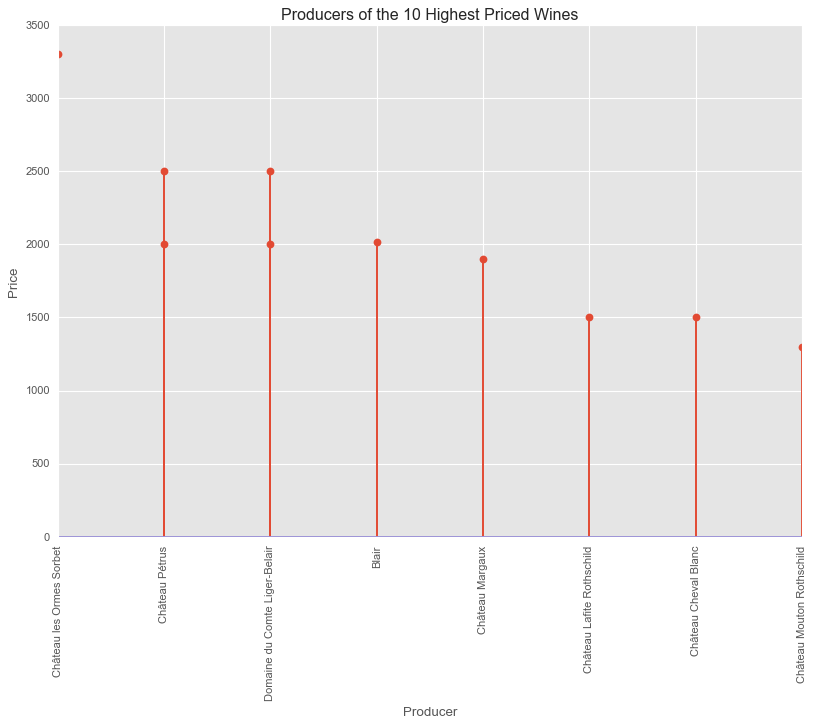

In [1269]:
# 10 largest prices.
plt.figure(figsize = (12,8))
highest_priced_10 = wine_df.nlargest(10, 'price')

plt.stem(highest_priced_10['winery'], highest_priced_10['price'], use_line_collection = True)

plt.title('Producers of the 10 Highest Priced Wines')
plt.xticks(rotation = 90)
plt.xlabel('Producer')
plt.ylabel('Price');

<a id='10_plot'></a>
____
**Highest-Priced Wine and Outlier Analysis**

____
* There are a few surprises regarding the outliers in the price and rating relationship. 
* The first suprise is big. The top spot only has an 88 rating. That is because this wine is not a highly recognized label and normally retails for around 20 dollars per bottle. I will chnage the value of this wine to more adequately reflect it's actual price point. 
* Another suprise is the wine from Blair winery. Not only did my duplicate value removal not catch this duplicate but this is normally a 45 dollar Chardonnay. It's a good wine but one would have a hard time trying to fetch 2000 dollars for this wine. The vintage of this wine is 2013. It appears someone mistakenly entered the vintage for price. I will change the value to 45 to more realistically represent its price and I will drop the duplicate value. 
* I have also notice another duplicate description that hasn't been removed. The Chateau Margaux is listed twice. I will drop one. Outside of those values in the top ten nothing else stood out. 

In [1270]:
# replacing incorrect values
wine_df.loc[13318, 'price'] = 45
wine_df.loc[231220, 'price'] = 20
wine_df.loc[80290, 'price'] = 20

In [1271]:
wine_df.drop([120391], axis = 0, inplace = True)

<a id='10_plot'></a>
_____
#### Top 10 Largest Prices After Removing Errant Values
____

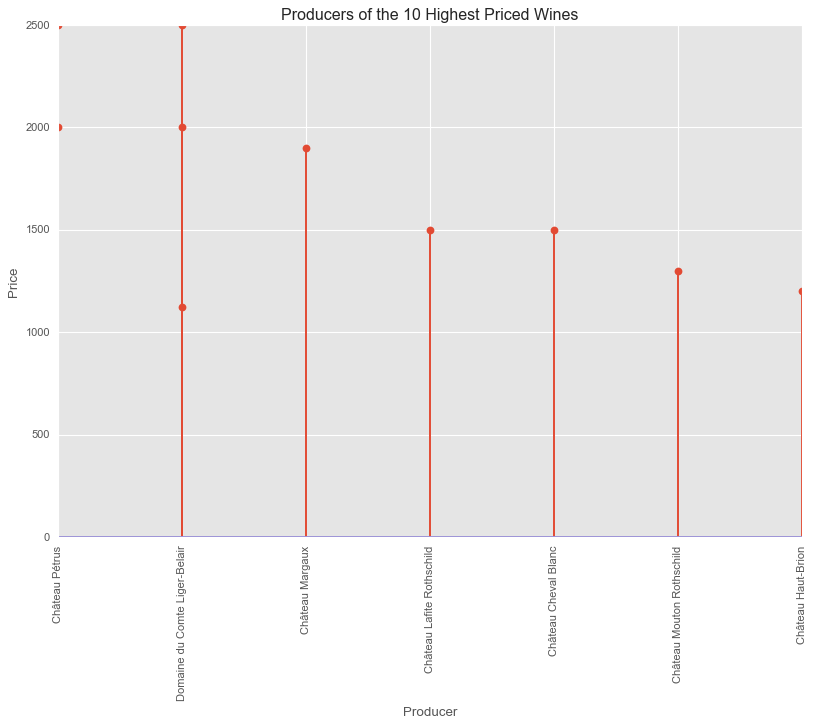

In [1272]:
# 10 largest prices.
plt.figure(figsize = (12,8))
highest_priced_10 = wine_df.nlargest(10, 'price')

plt.stem(highest_priced_10['winery'], highest_priced_10['price'], use_line_collection = True)

plt.title('Producers of the 10 Highest Priced Wines')
plt.xticks(rotation = 90)
plt.xlabel('Producer')
plt.ylabel('Price');


<a id='afford'></a>
____
#### Most Affordable Wines** (Wines under $100)
_____

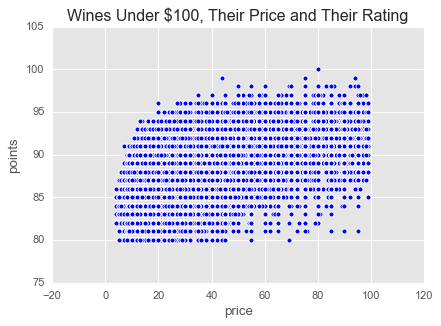

In [1273]:
plt.figure(figsize=(6,4))
affordable = wine_df[wine_df['price'] < 100]


sns.scatterplot(affordable['price'], affordable['points'] )
plt.title('Wines Under $100, Their Price and Their Rating');

**Analysis of Most Affordable Wines**

* Through my personal experiences I have always thought that you can find great value in wines around the 30 to 40 dollar range and the 60 to 70 dollar range. This scatterplot seems to confirm that with a few spikes in frequency occcuring in that range. 


<a id='designation'></a>
___
#### Price and Designation Relationship
___

In [1274]:
des_price_df = wine_df.groupby('designation').mean()
des_price_df_largest = des_price_df.nlargest(5000, 'price')
des_price_df_smallest = des_price_df.nsmallest(5000, 'price')

In [1275]:
des_price_df_largest.head()

,points,price
designation,,
90-year Old Tawny,97.000000,1000.000000
Clos du Mesnil Brut Blanc de Blancs,99.000000,800.000000
Hill of Grace,93.500000,800.000000
El Perer,96.000000,770.000000
Kiedrich Gräfenberg Trockenbeerenauslese,96.333333,730.666667


In [1276]:
des_price_df_smallest.head(20)

,points,price
designation,,
Flirty Bird,83.5,4.000000
UnWineD,86.0,4.000000
D'Ó,84.0,5.000000
Fizz,87.0,5.000000
Mini,86.0,5.000000
Toutalga Tinto,85.0,5.000000
Twin Valley,84.0,5.000000
Twin Valley White,83.0,5.000000
Gato Negro,82.0,5.666667


* The cheapest, is flirty bird. After a few bottles you'll feel, well...like a flirty bird. My favorite is Abrazo del Toro. Hug from a Bull. Wow, I bet this cheap wine will go down about as smooth as a hug from a bull. Lastly, this one will be a class favorite for sure. Given all the cat lovers here you are bound to love Gato Blanco. This is my pick as a wine you buy by the case to have when your friends who don't know anything about wine come over. 

_____
**Mean Price and Points of Vineyard or Fantasy-name Designated wines**
_____

In [1277]:
mean_des = des_price_df.mean()
print(f'The average price you pay for named vineyard or fantasy-labeled wines: ${round(mean_des[1], 2)}.')
print(f'The average point rating you get for named vineyard or fantasy-labeled wines: {round(mean_des[0], 2)} points.')

The average price you pay for named vineyard or fantasy-labeled wines: $38.3.
The average point rating you get for named vineyard or fantasy-labeled wines: 88.64 points.


____
**Mean Price and Points of All Wines**
____

In [1278]:
all_point_mean = wine_df['points'].mean()
all_price_mean = wine_df['price'].mean()
print(f'The average price you pay for all wines: ${round(all_price_mean, 2)}.')
print(f'The average point rating you get for all wines: {round(all_point_mean, 2)} points.')

The average price you pay for all wines: $35.54.
The average point rating you get for all wines: 88.44 points.


**You tend to pay slightly more for designated wines than normal wines.** and, on average, you do not gain anything in terms of quality. 

<a id='expensive'></a>
____
#### Most Expensive vs Least Expensive Wines and Their Ratings
_____

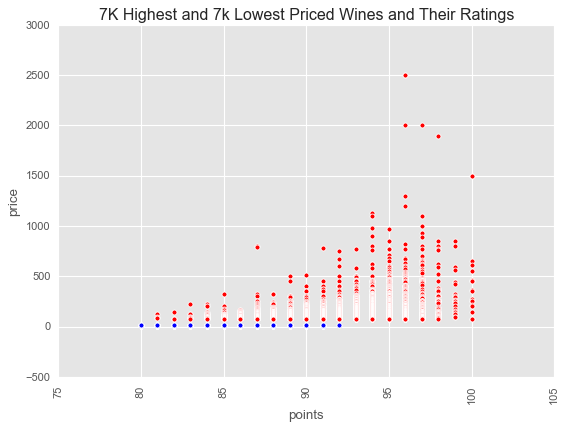

In [1279]:
largest_priced_wines = wine_df.nlargest(7000, columns = 'price')['price']
largest_priced_wines_points = wine_df.nlargest(7000, columns = 'price')['points']
smallest_priced_wines = wine_df.nsmallest(7000, columns = 'price')['price']
smallest_priced_wines_points = wine_df.nsmallest(7000, columns = 'price')['points']

sns.scatterplot(largest_priced_wines_points, largest_priced_wines, color = 'red')
sns.scatterplot(smallest_priced_wines_points, smallest_priced_wines, color = 'blue')

plt.title('7K Highest and 7k Lowest Priced Wines and Their Ratings')
plt.xticks(rotation = 90);

In [1280]:
print(f'The minimum price of the highest priced wines: ${largest_priced_wines.min()}')
print(f'The maximum price of the lowest priced wines: ${smallest_priced_wines.max()}')

The minimum price of the highest priced wines: $78.0
The maximum price of the lowest priced wines: $11.0


___
**Three Wines had a price less than or equal to $11 and greater than or equal to 92 point rating!**

In [1281]:
wine_df[(wine_df['price'] <= 11) & (wine_df['points'] >= 92)]

,winery,varietal,designation,country,province,description,region_1,region_2,points,price,taster_name,title
29236,Aveleda,Touriga Nacional-Cabernet Sauvignon,Follies Fonte Nossa Senhora da Vandoma,Portugal,Bairrada,Mainly Touriga Nacional with 30% Cabernet Sauv...,unknown,unknown,92.0,11.0,Roger Voss,Aveleda 2011 Follies Fonte Nossa Senhora da Va...
56899,Pedra Cancela,Portuguese Red,Seleção do Enólogo,Portugal,Dão,This lightly wood-aged wine is slightly auster...,unknown,unknown,92.0,11.0,Roger Voss,Pedra Cancela 2010 Seleção do Enólogo Red (Dão)
128010,Pacific Rim,Riesling,unknown,US,Washington,A classic Washington tasting-room Riesling—onl...,Columbia Valley (WA),Columbia Valley,92.0,11.0,Paul Gregutt,Pacific Rim 2009 Riesling (Columbia Valley (WA))


<a id='price_per'></a>
_______
#### Wine Price for Each Wine Rating
_______

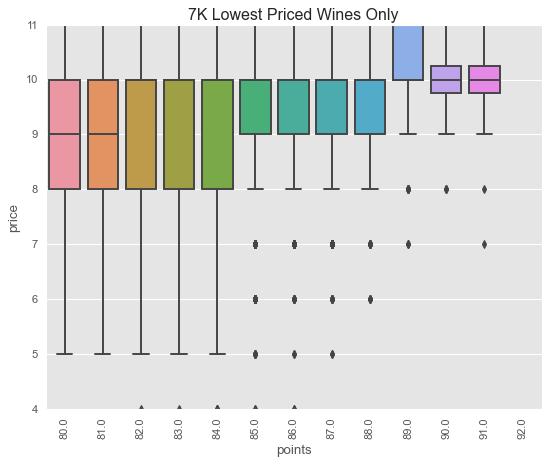

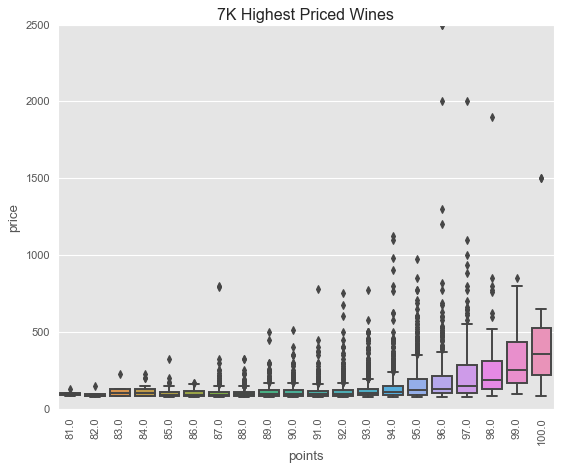

In [1282]:
# Lowest priced wines only.

plt.figure(figsize = (8,6))
sns.boxplot(smallest_priced_wines_points, smallest_priced_wines)

plt.title('7K Lowest Priced Wines Only')
plt.xticks(rotation = 90);

#####

# Highest priced wines only. 
plt.figure(figsize = (8,6))
sns.boxplot(largest_priced_wines_points, largest_priced_wines)

plt.title('7K Highest Priced Wines')
plt.xticks(rotation = 90);



**Analysis of Highest Price and Smallest Prices and their Ratings.** 

* To a point there is quite a bit of overlap in ratings between the highest and lowest priced wines. After the 93 point threshold the price of a wine begins to reach toward the `$100` dollar range and is in the 5000 highest priced bottles of wine in the study. 
* There is also a ton of variation among the highest priced wines when considering not only price but also rating. Some of the most expensive wines received among the lowest ratings while many received among the heighest. 
* There is a positive relationship between price and point rating among the highest and the lowest priced wines. However, there are some serious bargains to found. A few examples are the wines with a 93 or above rating and a $`14` and lower price point.

**Fantastic Value Wines**

Priced under $9 dollars with a rating over 90

In [1283]:
wine_df[(wine_df['price'] < 9) & (wine_df['points'] > 90)]

,winery,varietal,designation,country,province,description,region_1,region_2,points,price,taster_name,title
26101,Snoqualmie,Riesling,Winemaker's Select,US,Washington,"With full ripeness, density and concentration,...",Columbia Valley (WA),Columbia Valley,91.0,8.0,Paul Gregutt,Snoqualmie 2006 Winemaker's Select Riesling (C...
34629,Herdade dos Machados,Portuguese Red,Toutalga,Portugal,Alentejano,"Richly tannic, this concentrated wine has grea...",unknown,unknown,91.0,7.0,Roger Voss,Herdade dos Machados 2012 Toutalga Red (Alente...


<a id='95'></a>
______
#### Wine Price and Ratings Greater than 95
______

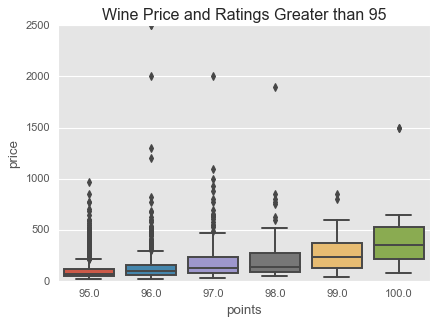

In [1284]:
the_greatest_points = wine_df[wine_df['points'] >= 95]
the_greatest_points_price = the_greatest_points['price']
the_greatest_points_rating = the_greatest_points['points']

plt.figure(figsize = (6,4))
sns.boxplot(the_greatest_points_rating, the_greatest_points_price)

plt.title('Wine Price and Ratings Greater than 95');

________
#### Producer and Price
_______

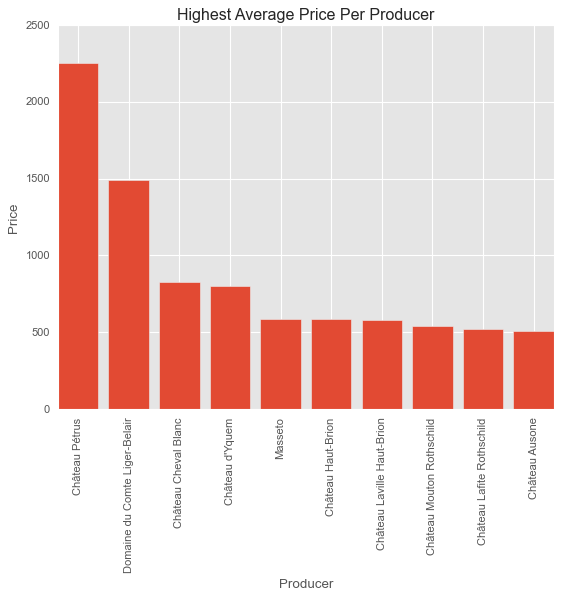

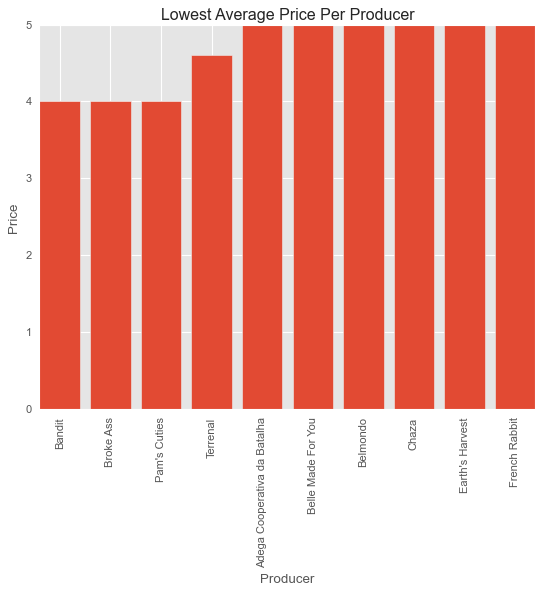

In [1285]:
prod_price_large = wine_df.groupby('winery').mean().nlargest(10, 'price')
prod_price_small = wine_df.groupby('winery').mean().nsmallest(10, 'price')


plt.figure(figsize = (8, 6))
plt.bar(prod_price_large.index, prod_price_large['price'])

plt.xticks(rotation = 90)
plt.xlabel('Producer')
plt.ylabel('Price')
plt.title('Highest Average Price Per Producer');

#####
plt.figure(figsize = (8, 6))

plt.bar(prod_price_small.index, prod_price_small['price'])

plt.xticks(rotation = 90)
plt.xlabel('Producer')
plt.ylabel('Price')
plt.title('Lowest Average Price Per Producer');

#####

<a id='100'></a>
_______
#### 100 Point Producers and Price Chart
_______

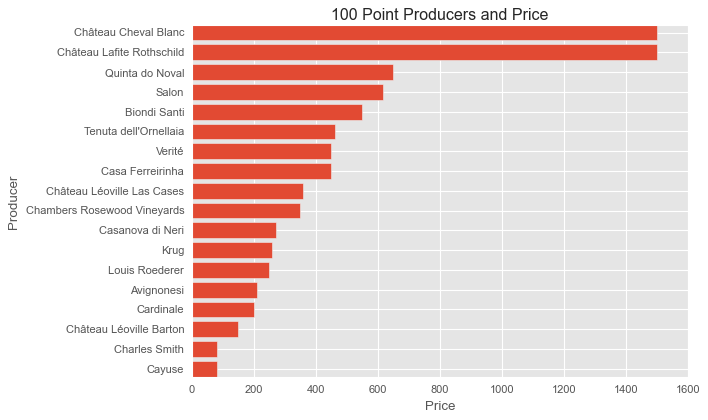

In [1286]:
the_greatest_points_producer = the_greatest_points.loc[:, ['winery', 'points', 'price']]
one_hund_pointers = the_greatest_points_producer.nlargest(18, 'points').sort_values('price')

plt.barh(one_hund_pointers['winery'], one_hund_pointers['price'])

plt.xlabel('Price')
plt.ylabel('Producer')
plt.title('100 Point Producers and Price');

In [1287]:
wine_df[(wine_df['country'] == 'US') & (wine_df['points'] == 100)]

,winery,varietal,designation,country,province,description,region_1,region_2,points,price,taster_name,title
45798,Cardinale,Cabernet Sauvignon,unknown,US,California,Tasted in a flight of great and famous Napa wi...,Napa Valley,Napa,100.0,200.0,unknown,Cardinale 2006 Cabernet Sauvignon (Napa Valley)
113929,Charles Smith,Syrah,Royal City,US,Washington,In 2005 Charles Smith introduced three high-en...,Columbia Valley (WA),Columbia Valley,100.0,80.0,Paul Gregutt,Charles Smith 2006 Royal City Syrah (Columbia ...
118058,Verité,Bordeaux-style Red Blend,La Muse,US,California,This wine dazzles with perfection. Sourced fro...,Sonoma County,Sonoma,100.0,450.0,unknown,Verité 2007 La Muse Red (Sonoma County)
123545,Cayuse,Syrah,Bionic Frog,US,Washington,Initially a rather subdued Frog; as if it has ...,Walla Walla Valley (WA),Columbia Valley,100.0,80.0,Paul Gregutt,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...


* Four American Producers in this list. Verite from Sonoma County with its 2014 La Muse offering currently goes for about `$450` dollars. Charles Smith's Royal City Syrah from Columbia Valley, WA. Cayuse Bionic Frog Syrah 2008 from Walla Walla of Columbia Valley, WA. The last one on the list is the Cardinale 2006 Napa Cab. All of these producers are fantastic producers. Charles Smith may be the biggest surprise to me but considering he produces almost around a dozen wines every year (with his K Vitners Label) that score over 95 points it should not be a surprise that he landed a 100 point score. 

<a id='region_price'></a>
_____
#### Regions by Price and Rating
_____

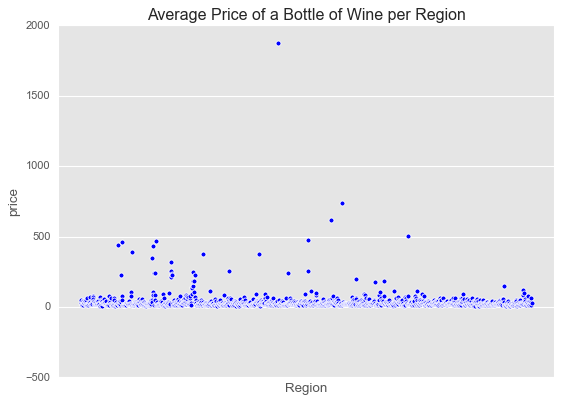

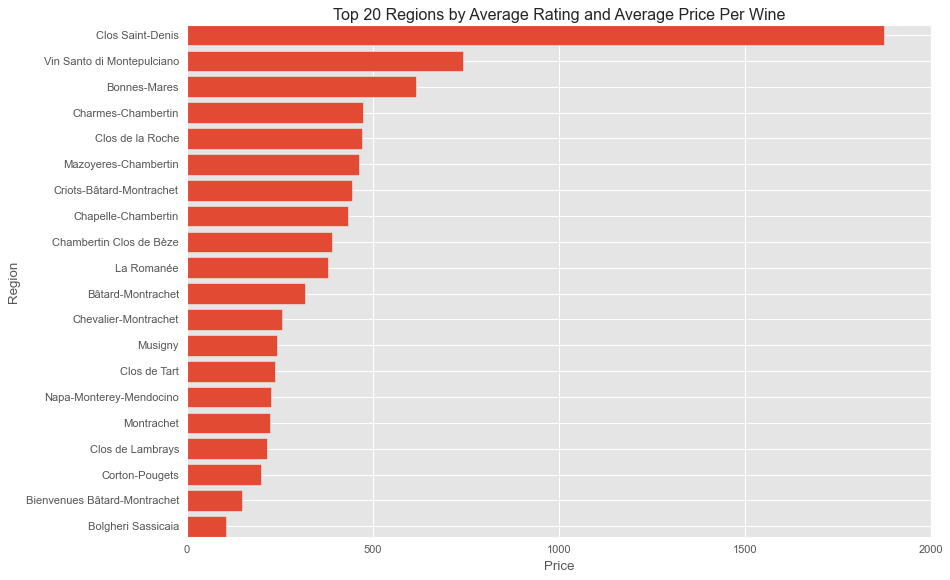

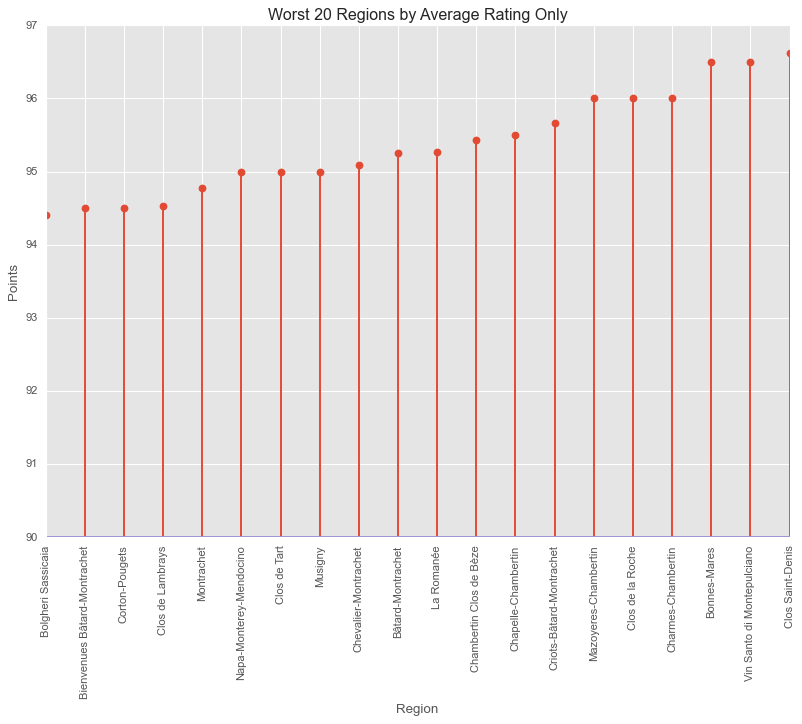

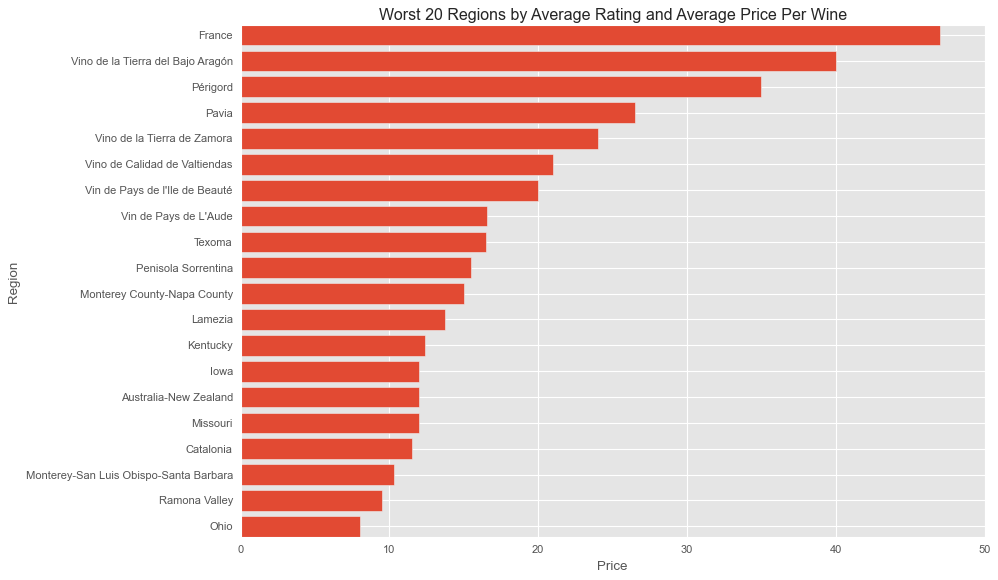

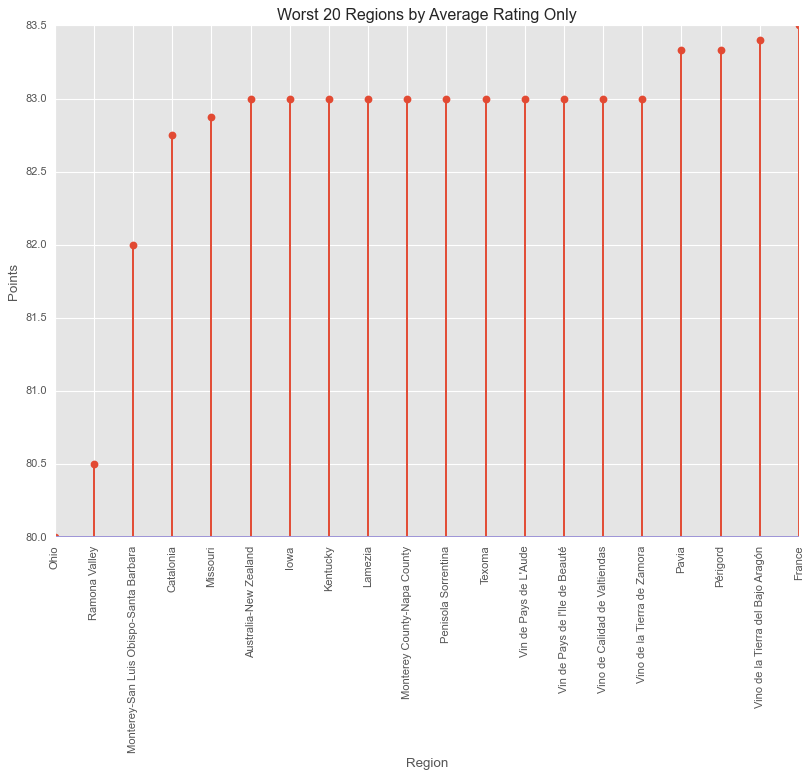

In [1288]:
region_df = wine_df.groupby('region_1').mean()

sns.scatterplot(region_df.index, region_df['price'])

plt.title('Average Price of a Bottle of Wine per Region')
plt.xlabel('Region')
plt.xticks([]) # Disabling Xicks because there are too many region names. 
;

# Plot by Average and Price
best_20_regions = region_df.nlargest(20, 'points')
best_20_regions_price = best_20_regions.sort_values('price')

plt.figure(figsize = (12, 8))

plt.barh(best_20_regions.index, best_20_regions_price['price'])

plt.xlabel('Price')
plt.ylabel('Region')
plt.title('Top 20 Regions by Average Rating and Average Price Per Wine');

#####
# Plot by Average Only

plt.figure(figsize = (12,8))

plt.stem(best_20_regions.index, best_20_regions_price['points'].sort_values(), bottom = 90, use_line_collection = True)

plt.title('Worst 20 Regions by Average Rating Only')
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Points');

#####

worst_20_regions = region_df.nsmallest(20, 'points')
worst_20_regions_price = worst_20_regions.sort_values('price')
plt.figure(figsize = (12,8))

plt.barh(worst_20_regions.index, worst_20_regions_price['price'])

plt.xlabel('Price')
plt.ylabel('Region')
plt.title('Worst 20 Regions by Average Rating and Average Price Per Wine');

###### 

plt.figure(figsize = (12,8))

plt.stem(worst_20_regions.index, worst_20_regions_price['points'].sort_values(), bottom = 80, use_line_collection = True)

plt.title('Worst 20 Regions by Average Rating Only')
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Points');


In [1289]:
regional_best_df = pd.DataFrame(best_20_regions.mean(), columns = ['Regional Average for 20 Best Regions'])
regional_best_df

,Regional Average for 20 Best Regions
points,95.376750
price,423.330368


In [1290]:
regional_all = pd.DataFrame(region_df.mean(), columns = ['Regional Average for All Regions'])
regional_all

,Regional Average for All Regions
points,87.912151
price,39.113101


<a id='varietal_price'></a>
_____
#### Varietal and Price
____

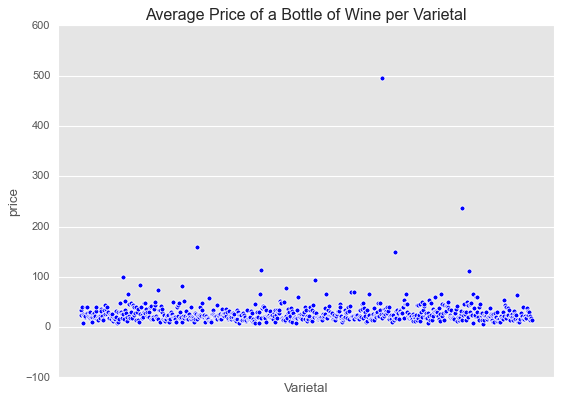

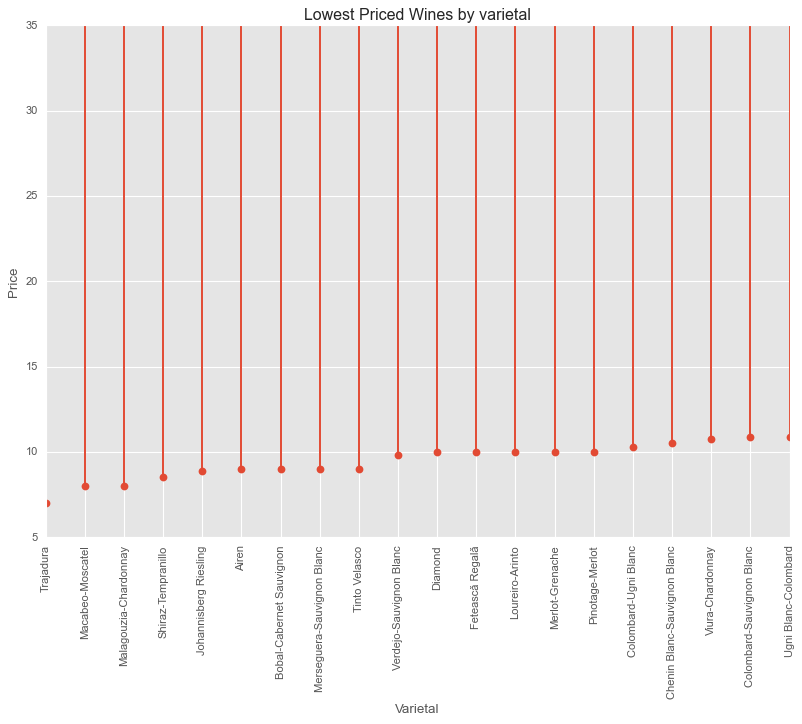

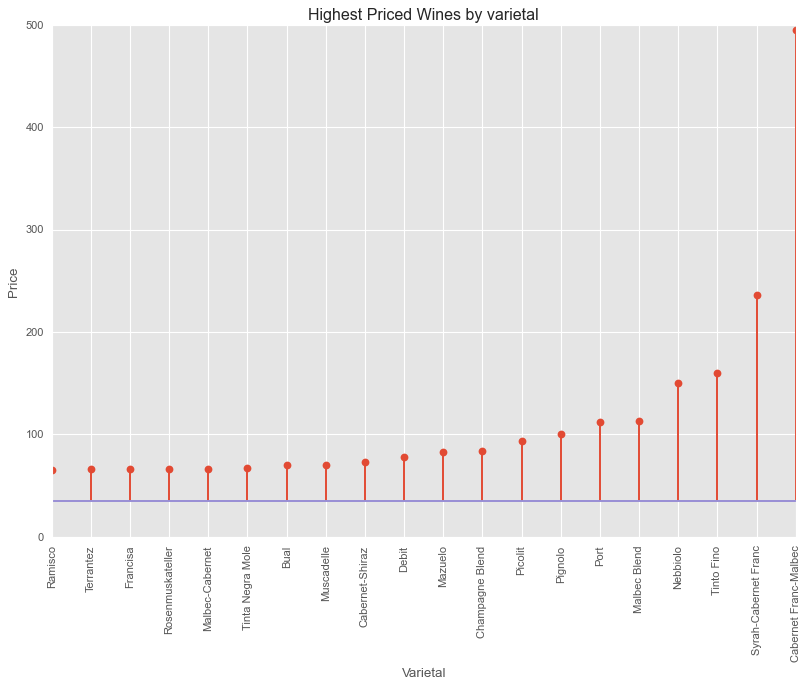

In [1291]:
wine_varietal = wine_df.groupby(['varietal']).mean()

sns.scatterplot(wine_varietal.index, wine_varietal['price'])

plt.title('Average Price of a Bottle of Wine per Varietal')
plt.xlabel('Varietal')
plt.xticks([]) # Disabling Xicks because there are too many varietal names. ;

#####

low_priced_varietals = wine_varietal.nsmallest(20, 'price')

plt.figure(figsize = (12,8))

plt.stem(low_priced_varietals.index, low_priced_varietals['price'].sort_values(), bottom = 35, use_line_collection = True)

plt.title('Lowest Priced Wines by varietal')
plt.xticks(rotation = 90)
plt.xlabel('Varietal')
plt.ylabel('Price');


#####

plt.figure(figsize = (12,8))

# Highest Priced Varietals

high_priced_varietals = wine_varietal.nlargest(20, 'price')

plt.stem(high_priced_varietals.index, high_priced_varietals['price'].sort_values(), bottom = 35, use_line_collection = True)

plt.title('Highest Priced Wines by varietal')
plt.xticks(rotation = 90)
plt.xlabel('Varietal')
plt.ylabel('Price');


<a id='rating_relate'></a>
_______________________________
# Wine Rating Relationships
________________________________

<a id='varietal_rating'></a>
_____
#### Rating By Varietal
______

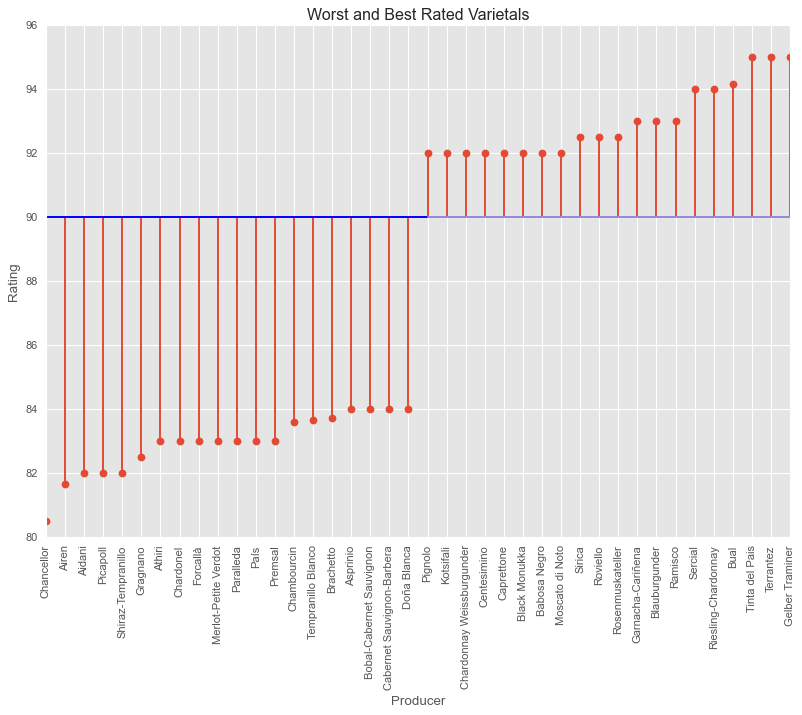

In [1302]:
worst_rated_varietals = wine_varietal.nsmallest(20, 'points')
plt.figure(figsize = (12,8))

plt.stem(worst_rated_varietals.index, worst_rated_varietals['points'], bottom = 90, use_line_collection = True)


plt.xticks(rotation = 90)
plt.xlabel('Producer')
plt.ylabel('Rating');

#####

best_rated_varietals = wine_varietal.nlargest(20, 'points').sort_values('points', ascending = True)
plt.axhline(90, color = 'blue')

plt.stem( best_rated_varietals.index, best_rated_varietals['points'], bottom = 90, use_line_collection = True)

plt.title('Worst and Best Rated Varietals')
plt.xticks(rotation = 90)
plt.xlabel('Producer')
plt.ylabel('Rating');

<a id='country_rating'></a>
____
#### Country and Rating
_____

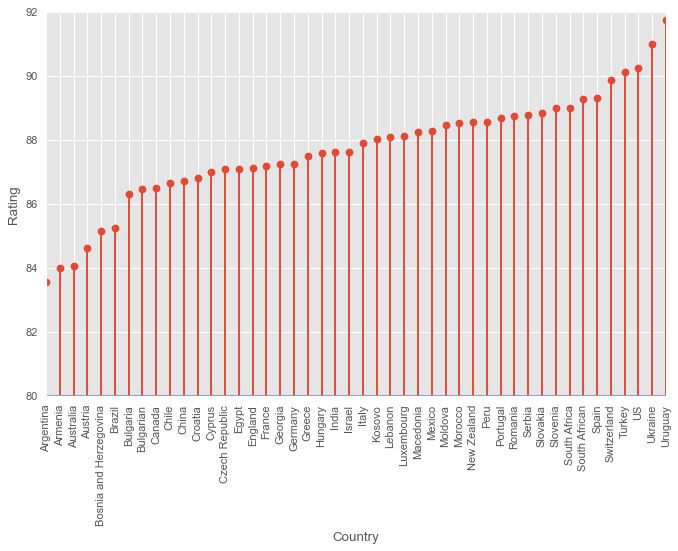

In [1293]:
country_rating = wine_df.groupby('country').mean()
country_rating

plt.figure(figsize = (10,6))
plt.stem(country_rating.index, country_rating['points'].sort_values(), bottom = 80, use_line_collection = True)
# plt.bar( country_rating.index, country_rating['points'].sort_values(), width = .8, edgecolor = 'white')

plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Rating');

<a id='country_rating'></a>
_______
#### Countries and 100 point wines
_______

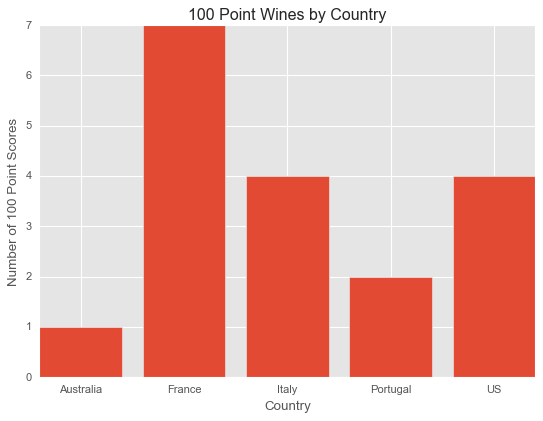

In [1294]:
wine_100 = wine_df[wine_df['points'] == 100]
country_100 = wine_100.groupby('country').count()

plt.bar(country_100.index , country_100['winery'])

plt.title('100 Point Wines by Country')
plt.xlabel('Country')
plt.ylabel('Number of 100 Point Scores');

<a id='producer_rating'></a>
_____
### 10 Largest Producers and Rating
____

In [1295]:
wine_df.reset_index(drop = True, inplace = True)

# for loop to create a list of the top 10 wineries as the appear in the DF
# and a list of points as they appear in the DF
point_list = []
winery_list = []

index = -1
for item in wine_df['winery']:
    index += 1
    if item in top10_wineries.index:
        winery_list.append(wine_df['winery'][index])
        point_list.append(wine_df['points'][index])

#Creating a DF out of the lists above
most_wines_df = pd.DataFrame(point_list, columns = ['points'])
winery_df = pd.DataFrame(winery_list, columns = ['winery'])
most_wines_df = pd.concat([winery_df, most_wines_df], axis = 1, ignore_index = True)
most_wines_df.rename(columns = {0: 'winery', 1: 'points'}, inplace = True) 

# Analyzing the values of the new DF. 
print(f"Average Points of All Top 10 Producers By Count: {round(most_wines_df['points'].mean(), 2)}")
print(f"Average Points for All Producers: {round(wine_df['points'].mean(), 2)}")

Average Points of All Top 10 Producers By Count: 88.92
Average Points for All Producers: 88.44


____
#### Plot of 10 Largest Producers and Their Ratings
____

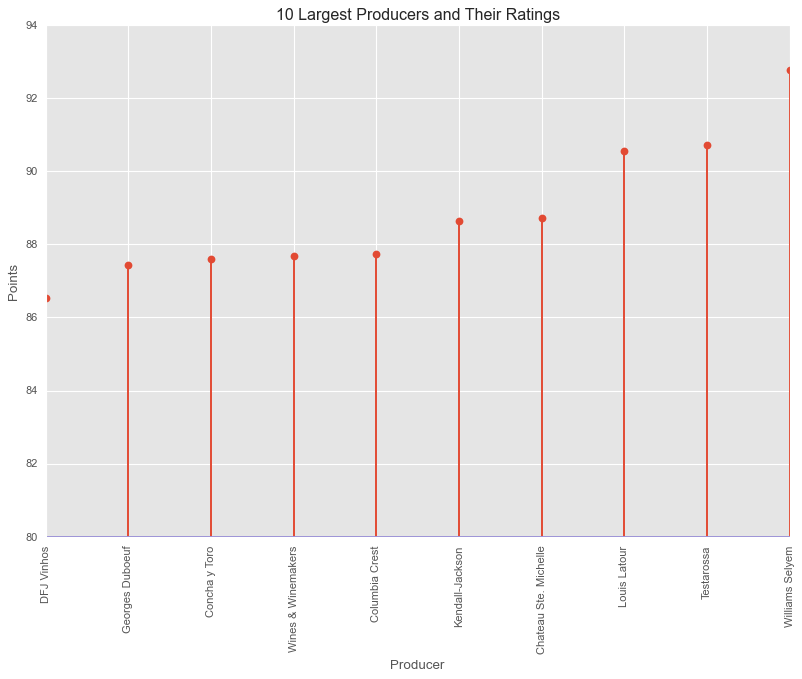

In [1296]:
most_wines_group = most_wines_df.groupby('winery').mean().sort_values('points')

plt.figure(figsize = (12,8))

plt.stem(most_wines_group.index, most_wines_group['points'], bottom = 80, use_line_collection = True)

plt.title('10 Largest Producers and Their Ratings')
plt.xticks(rotation = 90)
plt.xlabel('Producer')
plt.ylabel('Points');

_______
**Analysis of 10 Largest Producers and Their Ratings**
______

* The 10 largest producers seem to represent the entire sample very well. There are a few very high-quality producers that bring up the average rating for the rest of the producers. The mean rating for the 10 largest producers was almost identical to the sample population mean. The population mean is 88.45 points whereas the largest producers have an average points rating of 88.92. 
* There is somewhat broad assumption among consumers that you lose quality as the amount of bottles offered grows. However, Louis Latour, Testarosa and especilly Williams Selyem seems to defy that logic.
* Based on my knowledge Louis Latour does this by offering a variety of quality from lower-end village-level wine to the higher end Cru's and Premier Cru's of Burgundy. These wines at the lower end have a wide geographic focus and at the higher end they focus on the smallest and most highly coveted single vineyards. 
* Williams Selyem is essentially acting like the Louis Latour of California. The similarity lies in the focus of Burgundian style Pinot Noir and Chardonnay and on producing wines from some of the regions greatest sites. The only difference is that instead of offering some of the lower end wines, Williams Selyem focuses all of their efforts on higher-end offerings. That is what is most remarkable to me about Williams Selyem. They are able to offer a vast number of labels yet still keep quality high. 
* Williams Selyem's secret is focusing on limited releases (i.e. number of bottles offered per label is limited), single-vineyard or prominent regions that are highly renowned and also using only the highest quality grapes and manufacturing practices. That system has garnered William Selyem near cult-wine status while allowing them to also produce at scale. 



<a id='region_rating'></a>
______
### Rating By Region
______

#### Best and Worst Rated Regions
______

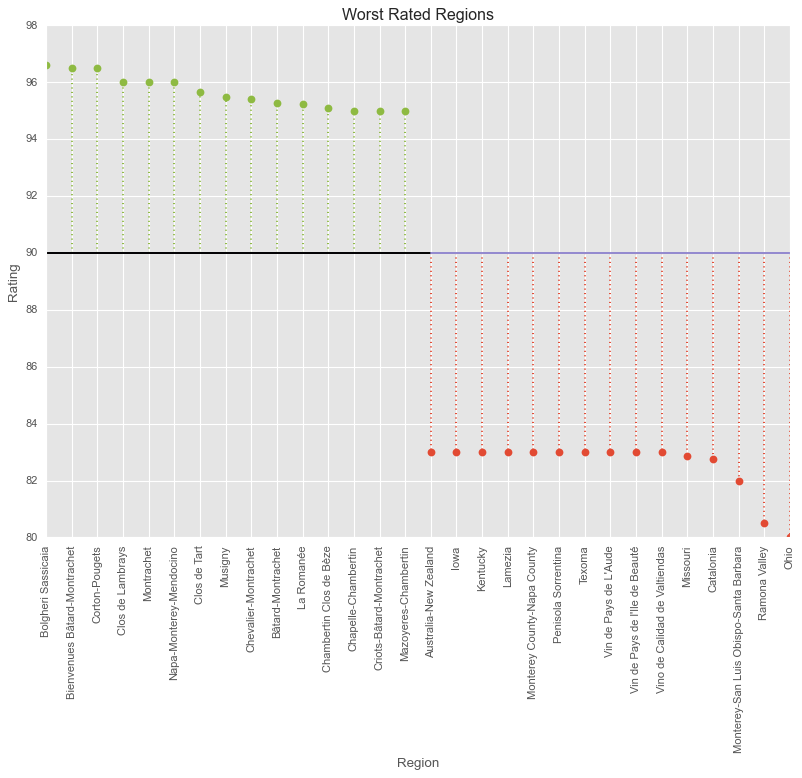

In [1297]:
region_df = wine_df.groupby('region_1').mean()
best_regions = region_df.nlargest(15, 'points')
worst_regions = region_df.nsmallest(15, 'points').sort_values('points', ascending = False)

# Create a color if the group is "B"
my_color=np.where(y>=90, 'green', 'orange')

plt.figure(figsize = (12,8))



plt.stem( best_regions.index, best_regions['points'], 
         bottom = 90, linefmt = 'C5:', markerfmt = 'C5o',
         use_line_collection = True)

plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Rating');

#####
ninety = plt.axhline(90, color = 'black')

plt.stem(worst_regions.index, worst_regions['points'], 
         bottom = 90, linefmt = 'C7:', markerfmt = 'C7o',
         use_line_collection = True)

plt.title('Best and Worst Rated Regions')
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Rating');


# Things to do

* chart relationship between designation and rating (where designation is not 'unknown')
* chart relationship between description and rating (where designation is not 'unknown')
* chart relationship between winery and rating
* chart relationship between taster_name and rating 
* wine ratings and price for wineries with 3 or less offerings. 

# Things I would like to do if I had more time. 
* Find highest and lowest given a minimum amount of observations. 
* find relationship between individual word descriptors and price. 
* Do NLP on 100 best and 100 worst wines and their descriptors.
* Do a Scattertext describing the difference. 
* Do a Scattertext between old world and new world wines. 
* chart reltionship between country and price.

___
# Preparing Dataframe for Export
____

______
### Cleaning up Description and Varietal Columns
_____
* **removing accent marks** from varietal field and description fields
* https://stackoverflow.com/questions/37926248/how-to-remove-accents-from-values-in-columns


In [ ]:
wine_df['varietal'] = wine_df['varietal'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
wine_df['description'] = wine_df['description'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

**Combining varietal labels** that could be under the same label for simplification. 
* Bordeaux blend with Cab
* Tempranillo blend with Tempranillo
* Pinot Gris and Pinot Grigio
* Grenache and Rhone Blends

In [ ]:
# replacing Bordeaux Blend with Cabernet
wine_df['varietal'] = wine_df['varietal'].str.replace('Bordeaux-style Red Blend', 'Cabernet Sauvignon')
# replacing Tempranillo Blend with Tempranillo
wine_df['varietal'] = wine_df['varietal'].str.replace('Tempranillo Blend', 'Tempranillo')
# replacing Pinot Gris with Pinot Grigio
wine_df['varietal'] = wine_df['varietal'].str.replace('Pinor Gris', 'Pinot Grigio')
# replace Shiraz with Syrah
wine_df['varietal'] = wine_df['varietal'].str.replace('Shiraz', 'Syrah')
# replace Rhone Blends with Grenache
wine_df['vareital'] = wine_df['varietal'].str.replace('Rhone-style Red Blend', 'Grenache')

_____
### Adding a Column Classifying Red or White
____
* This may be used in the modeling process. 

In [ ]:
whites = ['Chardonnay', 'Riesling', 'Sauvignon Blanc',
        'Gruner Veltliner', 'Pinot Grigio', 'Gewurztraminer',
       'Viognier', 'Glera', 'Chenin Blanc', 'Albarino', 'Garganega']

grapes_white = wine_df[wine_df['varietal'].isin(whites)]

In [ ]:
grapes_white['color'] = 'white' 
grapes_white.head(1)

In [ ]:
reds = ['Cabernet Sauvignon', 'Pinot Noir', 'Syrah', 'Merlot', 
        'Nebbiolo', 'Zinfandel', 'Sangiovese', 'Malbec', 'Tempranillo', 'Grenache']

grapes_red = wine_df[wine_df['varietal'].isin(reds)]

In [ ]:
grapes_red['color'] = 'red'
grapes_red.head(1)

_____
### Exporting DFs to CSV
_____
 * I am going to concatenate these two dfs after I upload them to the EDA and Preprocessing Notebook. I am keeping them separate to keep the size under the 25mb limit set by Google Colab. I will be running the second notebook in Colab due to the computationally expensive libraries and functions I will be using. 
 _____

In [ ]:
grapes_red.to_csv('../data/red_cleaned', index = False)
grapes_white.to_csv('../data/white_cleaned', index = False)